# **Project Description: Acquisition Price Prediction Model**  

**Objective:**  
Develop a **machine learning model** to predict **acquisition deal prices** using historical M&A data, including company profiles, financials, deal terms, and market trends.  

**Data Features Used:**  
- **Company Attributes** (IPO status, funding, employees, industry)  
- **Deal Terms** (cash/stock, status, year)  
- **Market & Financials** (total funding, acquisitions history)  
- **Geographic & Temporal Factors** (location, announcement year)  

**Methodology:**  
1. **Data Preprocessing**: Clean and normalize structured/unstructured data (e.g., news, profiles).  
2. **Feature Engineering**: Extract key predictors (e.g., revenue multiples, growth metrics).  
3. **Model Training**: Test regression algorithms (XGBoost, Random Forest, Neural Networks).  
4. **Deployment**: API integration for real-time price estimation.  

**Outcome:**  
A tool for investors and analysts to **estimate fair acquisition values** based on comparable deals and company fundamentals.  

# ```Libraries Importing and Data overview```

In [1]:
from Modules import Preprocessing, AddressParser, DateParser, Encoding, Merge

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import math

from sklearn.impute import KNNImputer

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import contractions
import string
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression, SelectKBest

from joblib import dump

## Data Reading & Merging

In [2]:
folder_path = "C:\\Users\\HP\\OneDrive - Faculty of Computer and Information Sciences (Ain Shams University)\\ML_Project\\Test_Script\\"
df_merged, df_members  = Merge.merge(folder_path)

## Data Sample

### Merged DataFrame

In [3]:
df_merged.head()

,Acquisitions ID,Acquiring Company,Year of acquisition announcement,Deal announced on,Price,Status,Terms,Acquisition Profile,News,News Link,...,Address (HQ)_acquired,City (HQ)_acquired,State / Region (HQ)_acquired,Country (HQ)_acquired,Description_acquired,Homepage_acquired,Twitter_acquired,Acquired by,Acquisitions ID_acquired,API_acquired
0,EMC acquired Data Domain in 2009,EMC,2009,8/07/2009,"$2,100,000,000",Undisclosed,Cash,http://www.crunchbase.com/acquisition/5dc676a1...,EMC acquired Data Domain,http://www.businesswire.com/news/home/20090708...,...,"176 South Street, Hopkinton, Massachusetts, Un...",Hopkinton,Massachusetts,United States,Data Domain offers disk-to-disk D2D and offsit...,http://www.emc.com/datadomain,http://twitter.com/emccorp,EMC,EMC acquired Data Domain in 2009,http://api.crunchbase.com/v/2/organization/dat...
1,AOL acquired Quigo in 2007,AOL,2007,7/11/2007,"$363,000,000",Undisclosed,Cash,http://www.crunchbase.com/acquisition/ad686848...,NaN,NaN,...,"90 Park Avenue, 10th Floor, New York City, New...",New York City,New York,United States,Quigo is an ad-targeting network that provides...,http://quigo.com,http://twitter.com/QuigoAds,AOL,AOL acquired Quigo in 2007,http://api.crunchbase.com/v/2/organization/qui...
2,Cisco acquired PostPath in 2008,Cisco Systems,2008,27/08/2008,"$215,000,000",Undisclosed,Undisclosed,http://www.crunchbase.com/acquisition/6a18cc70...,Cisco Announces Definitive Agreement to Acquir...,http://newsroom.cisco.com/dlls/2008/corp_08270...,...,"444 Castro St., Suite 200, Mountain View, Cali...",Mountain View,California,United States,"PostPath, Inc. develops email and collaboratio...",http://www.postpath.com,NaN,Cisco Systems,Cisco acquired PostPath in 2008,http://api.crunchbase.com/v/2/organization/pos...
3,Oracle acquired BigMachines in 2013,Oracle,2013,24/10/2013,"$400,000,000",Undisclosed,Undisclosed,http://www.crunchbase.com/acquisition/e856d7c1...,Oracle Corporation acquired BigMachines,http://www.businessinsider.in/Source-Oracle-Pa...,...,"570 Lake Cook Road, Suite 225, Deerfield, Illi...",Deerfield,Illinois,United States,BigMachines is the global leader in enabling B...,http://www.bigmachines.com,http://twitter.com/BigMachines,Oracle,Oracle acquired BigMachines in 2013,http://api.crunchbase.com/v/2/organization/big...
4,Yahoo! acquired Snip.it in 2013,Yahoo,2013,22/01/2013,"$10,000,000",Undisclosed,"Cash, Stock",http://www.crunchbase.com/acquisition/e2dcb91d...,Yahoo Buys Snip.it The Pinterest-Meets-News St...,http://techcrunch.com/2013/01/22/yahoo-buys-sn...,...,"181 Fremont Street, San Francisco, California,...",San Francisco,California,United States,Snip.it allows you to collect the best of the ...,http://snip.it,http://twitter.com/Snipit,Yahoo,Yahoo! acquired Snip.it in 2013,http://api.crunchbase.com/v/2/organization/sni...


### Members DataFrame

In [4]:
df_members.head()

,Name,CrunchBase Profile,Role,Companies,Image
0,Hans-Werner Hector,http://de.wikipedia.org/wiki/Hans-Werner_Hector,Founder,SAP,http://images.forbes.com/media/lists/10/2006/4...
1,Akio Morita,http://en.wikipedia.org/wiki/Akio_Morita,Founder,Sony,http://www.adeptis.ru/vinci/akio_morita3.jpg
2,Alexander Graham Bell,http://en.wikipedia.org/wiki/Alexander_Graham_...,Founder,AT&T,https://upload.wikimedia.org/wikipedia/commons...
3,Andrew Viterbi,http://en.wikipedia.org/wiki/Andrew_Viterbi,Founder,Qualcomm,https://alum.mit.edu/sites/default/files/migra...
4,Bob Miner,http://en.wikipedia.org/wiki/Bob_Miner,Founder,Oracle,https://upload.wikimedia.org/wikipedia/commons...


## Unique Values

### Merged DataFrame

In [5]:
for column in df_merged.columns:
    unique = df_merged[column].unique()
    if len(unique) <= 10:
        print(column, ":", unique)

Status : ['Undisclosed' 'Complete' 'Pending' nan]
Terms : ['Cash' 'Undisclosed' 'Cash, Stock' 'Stock']
Number of Employees (year of last update) : [2013. 2012. 2014.   nan 2103. 2104.]
State / Region (HQ) : ['Massachusetts' 'New York' 'California' nan 'Washington' 'Texas'
 'Pennsylvania' 'West Berkshire' 'Ohio' 'Ontario']
Country (HQ) : ['United States' 'Norway' nan 'South Korea' 'United Kingdom' 'Germany'
 'Canada']


### Members DataFrame

In [6]:
for column in df_members.columns:
    unique = df_members[column].unique()
    if len(unique) <= 10:
        print(column, ":", unique)

Role : ['Founder' 'Board of Directors' 'Board of Directors, Advisory Board'
 'Advisory Board' 'Board Observer' 'Board of Directors, Founder']


## **Data Fields**  

#### **1. Acquisition Identification**  
- **Acquisition ID**: Unique identifier for the acquisition (combines acquirer, target, and year).  

#### **2. Companies Involved**  
- **Acquiring Company**: Name of the acquiring firm.  
- **Acquired Company**: Name of the target company.  
- **Year Founded (Acquirer & Target)**: Founding years of both companies.  
- **IPO Status (Acquirer & Target)**:  
  - **IPO Year** (if public)  
  - **Pre-IPO** (if private)  

#### **3. Deal Details**  
- **Deal Announcement**:  
  - **Year of Acquisition Announcement**  
  - **Deal Announced On** (exact date)  
- **Deal Value**:  
  - **Price** (USD or disclosed currency)  
  - **Status** (Pending / Completed / Terminated / Undisclosed)  
  - **Terms** (Cash / Stock / Cash & Stock / Undisclosed)  

#### **4. Company Profiles & Links**  
- **Acquisition Profile**: Link to the deal page (e.g., Crunchbase, SEC filing).  
- **Company Profiles**:  
  - **CrunchBase Profile** (Acquirer & Target)  
  - **Homepage** (Acquirer & Target)  
  - **Twitter/X Handle** (Acquirer & Target)  
- **News Coverage**:  
  - **News Summary** (Brief highlights)  
  - **News Link** (Source article)  

#### **5. Company Metadata**  
- **Logo**: Image/logo of both companies.  
- **Tagline & Description**: Short bio for both firms.  
- **Market Categories**: Industry sectors (e.g., SaaS, FinTech, AI).  
- **Key People**:  
  - **Founders**  
  - **Board Members & Executives**  

#### **6. Financial & Operational Data**  
- **Employees**:  
  - **Number of Employees** (at acquisition)  
  - **Last Updated Year**  
- **Funding & M&A History**:  
  - **Total Funding Raised** (Acquirer & Target)  
  - **Number of Acquisitions** (Acquirer’s history)  

#### **7. Location Data**  
- **HQ Address**:  
  - **Street Address**  
  - **City**  
  - **State/Region**  
  - **Country**  

#### **8. API Integration**  
- **API Endpoint**: Link to fetch structured acquisition data (JSON/GraphQL). 

## Data Info

### Merged DataFrame

In [7]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 48 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Acquisitions ID                            336 non-null    object 
 1   Acquiring Company                          336 non-null    object 
 2   Year of acquisition announcement           336 non-null    int64  
 3   Deal announced on                          336 non-null    object 
 4   Price                                      336 non-null    object 
 5   Status                                     335 non-null    object 
 6   Terms                                      336 non-null    object 
 7   Acquisition Profile                        335 non-null    object 
 8   News                                       314 non-null    object 
 9   News Link                                  314 non-null    object 
 10  CrunchBase Profile        

### Members DataFrame

In [8]:
df_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                382 non-null    object
 1   CrunchBase Profile  374 non-null    object
 2   Role                382 non-null    object
 3   Companies           382 non-null    object
 4   Image               345 non-null    object
dtypes: object(5)
memory usage: 15.1+ KB


# ```Data Preprocessing```

## Features Renaming
Using simpler names for easier access

In [9]:
Preprocessing.renaming(df_merged, df_members)

## Duplicates

In [10]:
print("The number of duplicates in Merged DataFrame:", df_merged.duplicated().sum())
print("The number of duplicates in Members DataFrame:", df_members.duplicated().sum())

The number of duplicates in Merged DataFrame: 0
The number of duplicates in Members DataFrame: 0


## Redundant data

Drop Redundant data

In [11]:
redundant_columns = ['Acquisitions_ID',
 'Acquisitions_ID_acquired',
 'Acquisitions_ID_acquiring',
 'Acquired_by']

df_merged.drop(columns=redundant_columns, inplace=True)

## URLs Handling

### Check Duplicates

In [12]:
URL_columns = ['Acquisition_Profile_Link', 'Acquisition_News_Link', 'CrunchBase_Profile', 'Image', 'Twitter', 'API', 'Homepage']
Unique_keys_columns = []

for key in URL_columns:
    if 'Acquisition' in key:
        column = key
        # Check if all keys are unique
        if df_merged[column].nunique(dropna=False) == len(df_merged):
            print(f"Unique {column} for each acquisition")
            Unique_keys_columns.append(column)
        else:
            print(f"{column} contains duplicates")
        print("Sample:", df_merged[column][0], '\n') 
    else:
        for prefix in ['Acquiring_', 'Acquired_']:
            column = prefix + key
            group_col = prefix + 'Company'
            # Check if keys are unique per company
            unique_count = df_merged.groupby(group_col)[column].nunique(dropna=False)
            if len(unique_count) == df_merged[group_col].nunique():
                print(f"Unique {column} for each {group_col}")
                Unique_keys_columns.append(column)
            else:
                print(f"Duplicate keys found in {column}")
                print(df_merged.groupby(group_col)[column].first().head())
            
            print("Sample:", df_merged[column][0], '\n')

Unique Acquisition_Profile_Link for each acquisition
Sample: http://www.crunchbase.com/acquisition/5dc676a13d41c2ee87169ce59476ec2d 

Acquisition_News_Link contains duplicates
Sample: http://www.businesswire.com/news/home/20090708006032/en/Data-Domain-Agrees-Acquired-EMC-33.50-share#.U08F1uZdXZQ 

Unique Acquiring_CrunchBase_Profile for each Acquiring_Company
Sample: www.crunchbase.com/organization/emc 

Unique Acquired_CrunchBase_Profile for each Acquired_Company
Sample: http://www.crunchbase.com/organization/data-domain 

Unique Acquiring_Image for each Acquiring_Company
Sample: http://a4.images.crunchbase.com/image/upload/c_pad,h_500,w_500/v1397181829/cdc987d2caef11a25acb3ce76625b3c6.png 

Unique Acquired_Image for each Acquired_Company
Sample: http://a1.images.crunchbase.com/image/upload/c_pad,h_500,w_500/v1397189925/ce2da32fe20ced6d2d513cd917995b22.png 

Unique Acquiring_Twitter for each Acquiring_Company
Sample: http://twitter.com/EMCcorp 

Unique Acquired_Twitter for each Acquir

**df_merged:**
- **Acquisition_Profile_Link**: Unique key for each acquisition
- **CrunchBase_Profile** & **Twitter** & **API**: have the name of the company "Redundant Data"
- **Image**: Unique key for each company

**df_Members:**
- **crunchbase_url** & **member_image**: have the name of the member and some unique keys.

### Drop columns with unique keys & redundant data

In [13]:
df_merged.drop(columns=Unique_keys_columns, inplace=True)
df_members.drop(columns=['crunchbase_url', 'member_image'], inplace=True)

## Data Extraction

### Address Division - Fill Missing Locations

In [14]:
AddressParser.fill_missing_locations(df_merged)

### Day & Month Extraction

In [15]:
DateParser.clean_date_columns(df_merged)

## Date Validation

In [16]:
DateParser.date_validate(df_merged)

## Encoding

### Numerical Features Reformatting

In [17]:
Encoding.numerical_reformatting(df_merged)

### Ordinal Features

In [18]:
Encoding.ordinal_features(df_merged)

### Features with multiple data

In [19]:
#One Hot Encoding
df_merged = Encoding.multipleFeatures(df_merged, min_threshold = 0.2, max_threshold = 0.7)

Acquiring_Company -> Extracted Features: Index([], dtype='object')
Acquired_Company -> Extracted Features: Index([], dtype='object')
Acquiring_City_HQ -> Extracted Features: Index([], dtype='object')
Acquired_City_HQ -> Extracted Features: Index([], dtype='object')
Acquiring_State_Region_HQ -> Extracted Features: Index(['Acquiring_State_California'], dtype='object')
Acquired_State_Region_HQ -> Extracted Features: Index(['Acquired_State_California'], dtype='object')
Acquiring_Market_Categories -> Extracted Features: Index(['Acquiring_category_Email', 'Acquiring_category_Search',
       'Acquiring_category_Software'],
      dtype='object')
Acquired_Market_Categories -> Extracted Features: Index(['Acquired_category_Software'], dtype='object')
Acquiring_Country_HQ -> Extracted Features: Index([], dtype='object')
Acquired_Country_HQ -> Extracted Features: Index(['Acquired_Country_United States'], dtype='object')
Terms -> Extracted Features: Index(['Term_Cash'], dtype='object')
Acquiring_Fou

## Nulls

### Percentage

In [20]:
ohe_columns_prefix = {
    'Company': 'Company_',
    'City_HQ': 'City_',
    'State_Region_HQ': 'State_',
    'Market_Categories': 'category_',
    'Country_HQ': 'Country_',
    'Terms': 'Term_',
    'Founders': 'Founder_',
    'Board_Members': 'Member_',
    'Companies': 'Comp_'
}
skip_columns = ['Status', 'News', 'Tagline', 'Description', 'Text', 'encoded'] + list(ohe_columns_prefix.keys())
print("The nulls in merged dataframe:- \n")
for column in df_merged:
    if any(key in column for key in skip_columns):
        continue
    null_rows = df_merged[df_merged[column].isnull()]
    count = null_rows.shape[0]
    percent = count / df_merged.shape[0] * 100
    if count > 0:
        print(column, "Count:", str(count) + ", Percentage:", percent.__format__('0.3f') + '%')

print("\nThe nulls in members dataframe:- \n")
for column in df_members:
    null_rows = df_members[df_members[column].isnull()]
    count = null_rows.shape[0]
    percent = count / df_members.shape[0] * 100
    if count > 0:
        print(column, "Count:", str(count) + ", Percentage:", percent.__format__('0.3f') + '%')

The nulls in merged dataframe:- 

Acquiring_Year_Founded Count: 12, Percentage: 3.571%
Acquiring_IPO Count: 16, Percentage: 4.762%
Acquiring_Number_of_Employees Count: 13, Percentage: 3.869%
Acquiring_Number_of_Employees_year_of_last_update Count: 13, Percentage: 3.869%
Acquiring_Total_Funding Count: 12, Percentage: 3.571%
Acquiring_Number_of_Acquisitions Count: 12, Percentage: 3.571%
Acquired_Year_Founded Count: 95, Percentage: 28.274%

The nulls in members dataframe:- 



### Numerical Features

In [21]:
imputer_feature_names = df_merged.select_dtypes(['int64', 'float64', 'Int64', 'int32']).columns.to_list()

imputer = KNNImputer(n_neighbors=3)
df_merged[imputer_feature_names] = imputer.fit_transform(df_merged[imputer_feature_names])

## Outliers

### Percentage

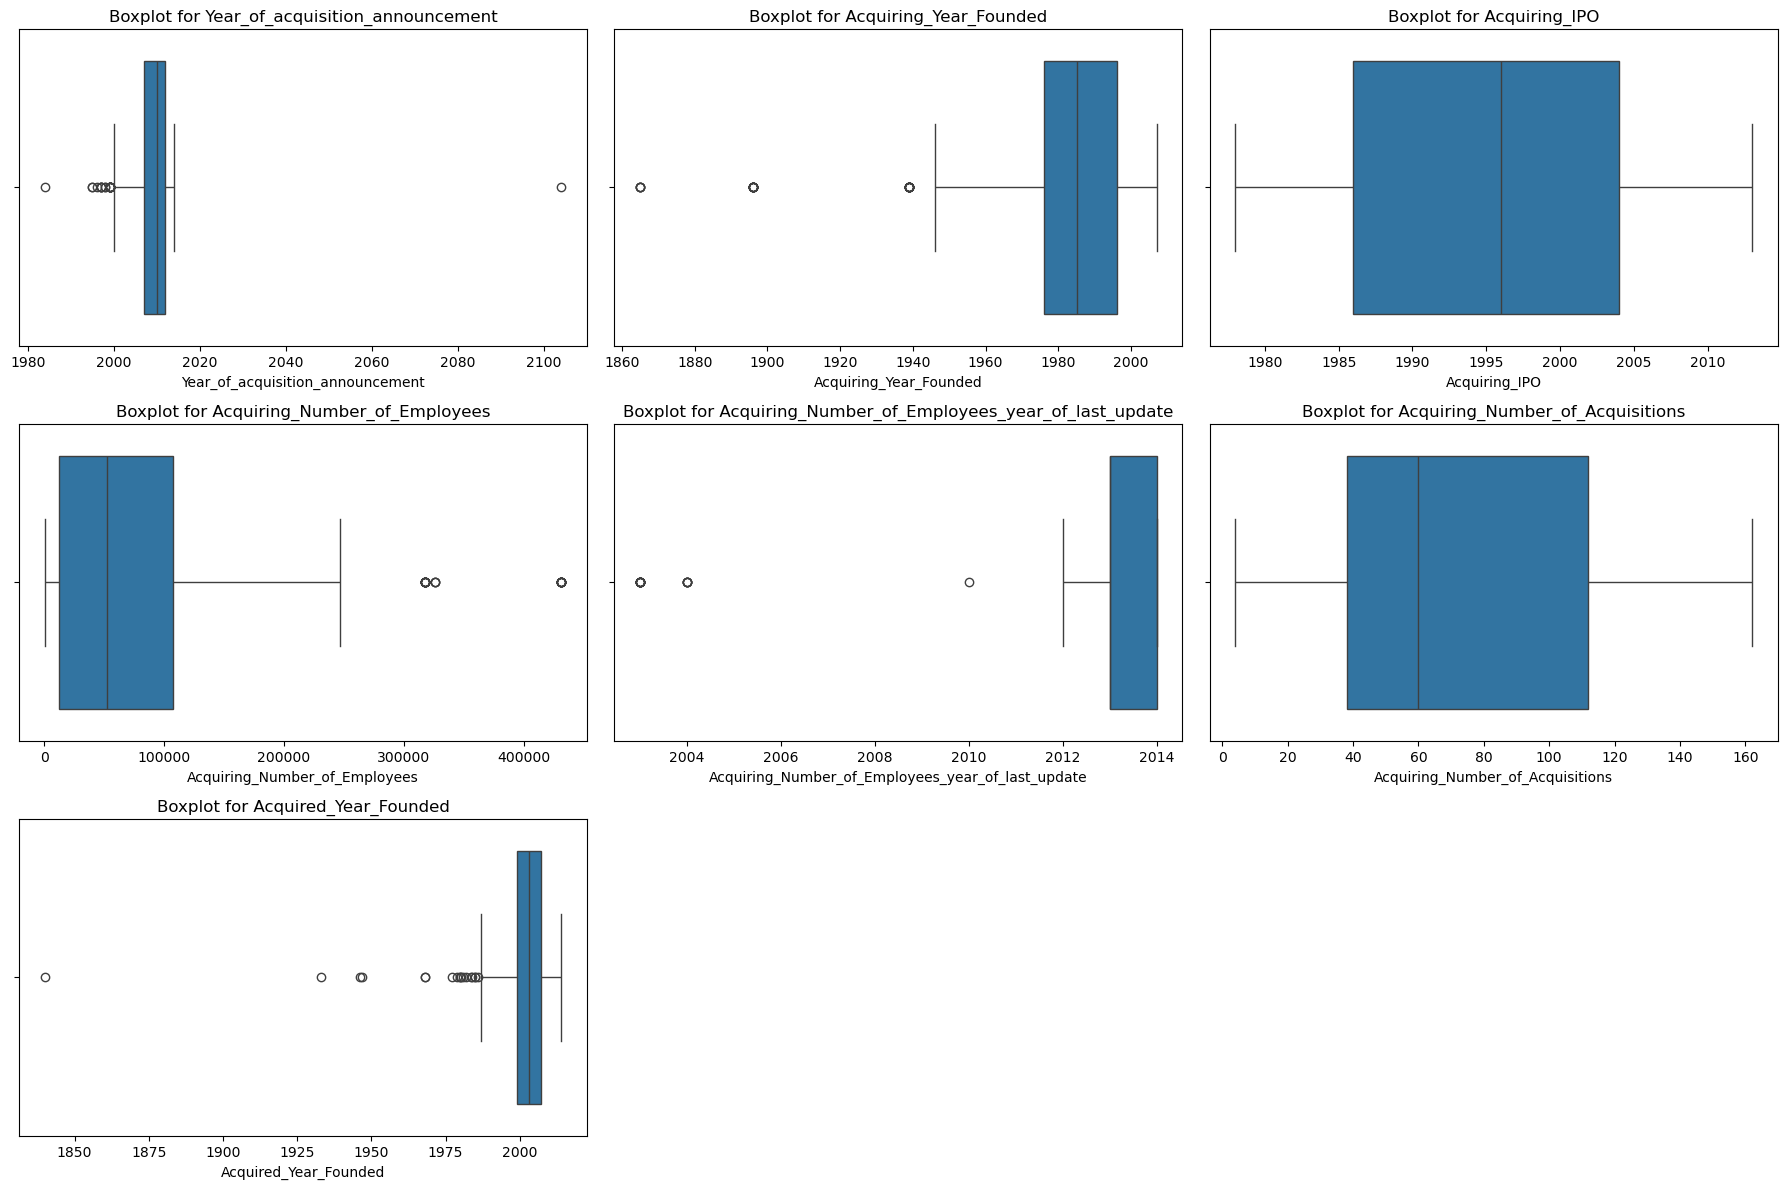

Outliers detected using Z-score method:
Year_of_acquisition_announcement: 2 outliers, Percent: 0.60%
Acquiring_Year_Founded: 15 outliers, Percent: 4.46%
Acquiring_Number_of_Employees: 11 outliers, Percent: 3.27%
Acquiring_Number_of_Employees_year_of_last_update: 17 outliers, Percent: 5.06%
Acquired_Year_Founded: 4 outliers, Percent: 1.19%

Outliers detected using IQR method:
Year_of_acquisition_announcement: 24 outliers, Percent: 7.14%
Acquiring_Year_Founded: 28 outliers, Percent: 8.33%
Acquiring_Number_of_Employees: 27 outliers, Percent: 8.04%
Acquiring_Number_of_Employees_year_of_last_update: 18 outliers, Percent: 5.36%
Acquired_Year_Founded: 18 outliers, Percent: 5.36%


In [22]:
cols_to_check = ['Year_of_acquisition_announcement', 'Acquiring_Year_Founded', 'Acquiring_IPO', 'Acquiring_Number_of_Employees',
                 'Acquiring_Number_of_Employees_year_of_last_update', 'Acquiring_Number_of_Acquisitions', 'Acquired_Year_Founded']
# Boxplots for selected columns - arranged in 3 columns
n_cols = 3
n_rows = (len(cols_to_check) + n_cols - 1) // n_cols  # Calculate needed rows

plt.figure(figsize=(18, n_rows * 4))  # Adjusted figure size
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df_merged, x=col)
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

# Z-score method
print("Outliers detected using Z-score method:")
for col in cols_to_check:
    valid_data = pd.to_numeric(df_merged[col], errors='coerce').dropna()
    if not valid_data.empty:
        valid_data_np = valid_data.to_numpy(dtype=np.float64) 
        z_scores = np.abs(stats.zscore(valid_data_np))
        outliers = (z_scores > 3).sum()
        if(outliers == 0): continue
        percent = outliers / df_merged.shape[0] * 100
        print(f"{col}: {outliers} outliers, Percent: {percent:.2f}%")
    else:
        print(f"{col}: No valid data to check.")

# IQR method
print("\nOutliers detected using IQR method:")
for col in cols_to_check:
    valid_data = df_merged[col].dropna()
    if not valid_data.empty:
        Q1 = valid_data.quantile(0.25)
        Q3 = valid_data.quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((valid_data < (Q1 - 1.5 * IQR)) | (valid_data > (Q3 + 1.5 * IQR))).sum()
        if(outliers == 0): continue
        percent = outliers / df_merged.shape[0] * 100
        print(f"{col}: {outliers} outliers, Percent: {percent:.2f}%")
    else:
        print(f"{col}: No valid data to check.")

### Skewness of data

In [23]:
for col in cols_to_check:
    print(col + ":", df_merged[col].skew().__format__('0.2f'))

Year_of_acquisition_announcement: 7.62
Acquiring_Year_Founded: -2.56
Acquiring_IPO: 0.08
Acquiring_Number_of_Employees: 2.15
Acquiring_Number_of_Employees_year_of_last_update: -3.63
Acquiring_Number_of_Acquisitions: 0.43
Acquired_Year_Founded: -7.31


### Outliers Clipping

In [24]:
def cap_outliers(col, series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if 'year' in col.lower():
        lower_bound = math.floor(lower_bound)
        upper_bound = math.ceil(upper_bound)
    return np.clip(series, lower_bound, upper_bound)

for col in cols_to_check:
    df_merged[col] = cap_outliers(col, df_merged[col])

## Text Handling

### Combine and Fill nulls

In [25]:
text_columns = [
    'Acquisition_News',
    'Acquisition_News_Link',
    'Acquiring_Tagline',
    'Acquiring_Description',
    'Acquired_Tagline',
    'Acquired_Description'
]

# Preprocess text data - fill NA and combine relevant columns
df_merged[text_columns] = df_merged[text_columns].fillna('')

# Create combined text features that might work better together
df_merged['Acquiring_Text'] = df_merged['Acquiring_Tagline'] + " " + df_merged['Acquiring_Description']
df_merged['Acquired_Text'] = df_merged['Acquired_Tagline'] + " " + df_merged['Acquired_Description']
df_merged['News_Text'] = df_merged['Acquisition_News'] + " " + df_merged['Acquisition_News_Link']

df_merged.drop(columns=text_columns, inplace=True)
text_columns = ['Acquiring_Text', 'Acquired_Text', 'News_Text']

### Custom Tokenizer

In [26]:
# Download required NLTK data
nltk.download(['punkt_tab', 'punkt', 'wordnet', 'stopwords'])

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Custom tokenizer with lemmatization and cleaning
def custom_tokenizer(text):
    text = contractions.fix(text) # Expand contractions
    text = str(text).lower() # Convert to lowercase
    
    # Url Handling
    url_match  = re.search(r'https?://(?:www\.)?([^/]+)', text)
    domain = ''
    if url_match:
        domain = url_match.group(1)
        domain = ' '.join(domain.split('.'))
        # Extract the path and split into parts
        path = re.sub(r'https?://[^/]+/', '', text)
        words = re.split(r'[/\-.#]', path)
        words.insert(1, domain)
        text = ' '.join(words)

    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    
    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize and filter
    tokens = [lemmatizer.lemmatize(token) for token in tokens if len(token) > 2]

    tokenized_text = ' '.join(tokens)
    return tokenized_text

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Apply Tokenizer

In [27]:
for column in text_columns:
    print(column, ":-")
    print("Text_Before:", df_merged[column].iloc[0])
    df_merged[column] =  df_merged[column].apply(custom_tokenizer)
    print("Text_After:", df_merged[column].iloc[0])
    count = df_merged[column].apply(lambda x: len(x.split(' ')))
    average_count = int(count.sum() / count.shape[0])
    print("average number of tokens:", average_count, '\n')

Acquiring_Text :-
Text_Before: EMC manufactures information management and storage software systems. EMC is a global leader in enabling businesses and service providers to transform their operations and deliver information technology as a service ITaaS. Fundamental to this transformation is cloud computing. Through innovative products and services, EMC accelerates the journey to cloud computing, helping IT departments to store, manage, protect and analyze their most valuable asset — information — in a more agile, trusted and cost-efficient way.EMC is a manufacturer of software and systems for information management and storage.  EMC produces a range of enterprise storage products, including hardware disk arrays and storage management software. Its flagship product, the Symmetrix, is the foundation of storage networks in many large data centers.
Text_After: emc manufacture information management storage software system emc global leader enabling business service provider transform opera

### TF-IDF

In [28]:
vectorizers = []

for column in text_columns:
    # Initialize the TF-IDF Vectorizer
    tfidf = TfidfVectorizer(
        min_df=0.2,           # Changed from 0.2 to keep rare terms
        max_df=0.7,         # Changed from 0.7 to keep common terms
        ngram_range=(1, 2), # Kept your original setting
        max_features=None   # Added to disable feature limit
    )

    tfidf_matrix = tfidf.fit_transform(df_merged[column].fillna(''))
    tfidf_df = pd.DataFrame(
        tfidf_matrix.toarray(),
        columns= [column +'_'+ x for x in tfidf.get_feature_names_out()]
    )
    vectorizers.append(tfidf)
    df_merged = pd.concat([df_merged, tfidf_df], axis=1)

df_merged.drop(columns=text_columns, inplace=True)

# ```Data Statistics and Visualization```

## Statistics Overview

In [29]:
df_merged.describe()

,Year_of_acquisition_announcement,Price,Acquiring_Year_Founded,Acquiring_IPO,Acquiring_Number_of_Employees,Acquiring_Number_of_Employees_year_of_last_update,Acquiring_Total_Funding,Acquiring_Number_of_Acquisitions,Acquired_Year_Founded,Deal_announced_on_Month,...,Acquired_Text_service,Acquired_Text_software,Acquired_Text_solution,Acquired_Text_technology,Acquired_Text_user,News_Text_acquires,News_Text_buy,News_Text_million,News_Text_techcrunch,News_Text_techcrunch com
count,336.000000,3.360000e+02,336.000000,336.000000,336.000000,336.000000,3.360000e+02,336.000000,336.000000,336.000000,...,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,2008.967262,1.143450e+09,1984.186508,1994.141865,70723.661706,2013.268849,2.965949e+08,76.011905,2002.017857,6.470238,...,0.143160,0.108861,0.116535,0.125384,0.130460,0.162305,0.220902,0.178739,0.277971,0.142069
std,4.117179,3.545527e+09,15.977978,10.517050,71211.872022,0.822250,1.711951e+09,51.491865,6.380345,3.208990,...,0.227677,0.225921,0.201604,0.244233,0.260350,0.328405,0.365216,0.317606,0.335257,0.172914
min,1999.000000,1.400000e+06,1946.000000,1978.000000,642.000000,2011.000000,0.000000e+00,4.000000,1987.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,6.687500e+07,1976.000000,1986.000000,12200.000000,2013.000000,0.000000e+00,38.000000,1999.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,1.937500e+08,1985.000000,1996.000000,52069.000000,2013.000000,6.700000e+06,60.000000,2003.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2012.000000,6.475000e+08,1996.000000,2004.000000,107600.000000,2014.000000,2.510000e+07,112.000000,2007.000000,9.000000,...,0.260655,0.000000,0.198490,0.124389,0.018548,0.000000,0.510764,0.343364,0.558163,0.294329
max,2020.000000,4.500000e+10,2007.000000,2013.000000,250700.000000,2014.000000,3.007950e+10,162.000000,2014.000000,12.000000,...,1.000000,1.000000,0.872471,1.000000,1.000000,1.000000,1.000000,1.000000,0.948329,0.536532


**Data Quality Brief:**  
- **Price**: Right-skewed with outliers (needs log-transform/winsorizing).  
- **Acquiring_Total_Funding**: Contains zeros (check: valid vs. missing).  
- **Status**: Mostly undisclosed (low informational value).

## Distribution Visualization Function

In [30]:
skip_columns = [
    'Acquiring_Member',
    'Acquiring_category',
    'encoded',
    'Text',
    'Acquiring_Market_Categories',
    'Acquiring_Founders',
    'Acquiring_Board_Members',
    'Acquired_Companies',
    'Acquiring_Company',
    'Acquired_Company',
    'Acquired_Market_Categories',
    'Acquired_State_Region_HQ',
    'Acquired_Country_HQ',
    'City_HQ',
    'Acquiring_Number_of_Employees_year_of_last_update'
]
def distribution_vis(df, title):
    rows = math.ceil(len(df.columns) / 3.0)
    fig, axes = plt.subplots(rows, 3, figsize = (15, 4 * rows))

    x = 0
    axes = axes.flatten()
    for column in df.columns:
        if any(keyword in column for keyword in skip_columns) or column in skip_columns:
            continue
        if column in df.select_dtypes('object'):
            sns.barplot(ax=axes[x], x=df[column].value_counts().index, y= df[column].value_counts(normalize= True).values * 100)
        else:
            sns.histplot(ax=axes[x], x=df[column], stat='percent')
        axes[x].set_title(title + column)
        axes[x].set_xlabel(column)
        for label in axes[x].get_xticklabels():
            label.set_rotation(45)
        axes[x].set_ylabel('Percentage (%)')
        x += 1

    for i in range(x, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

## Features Distribution

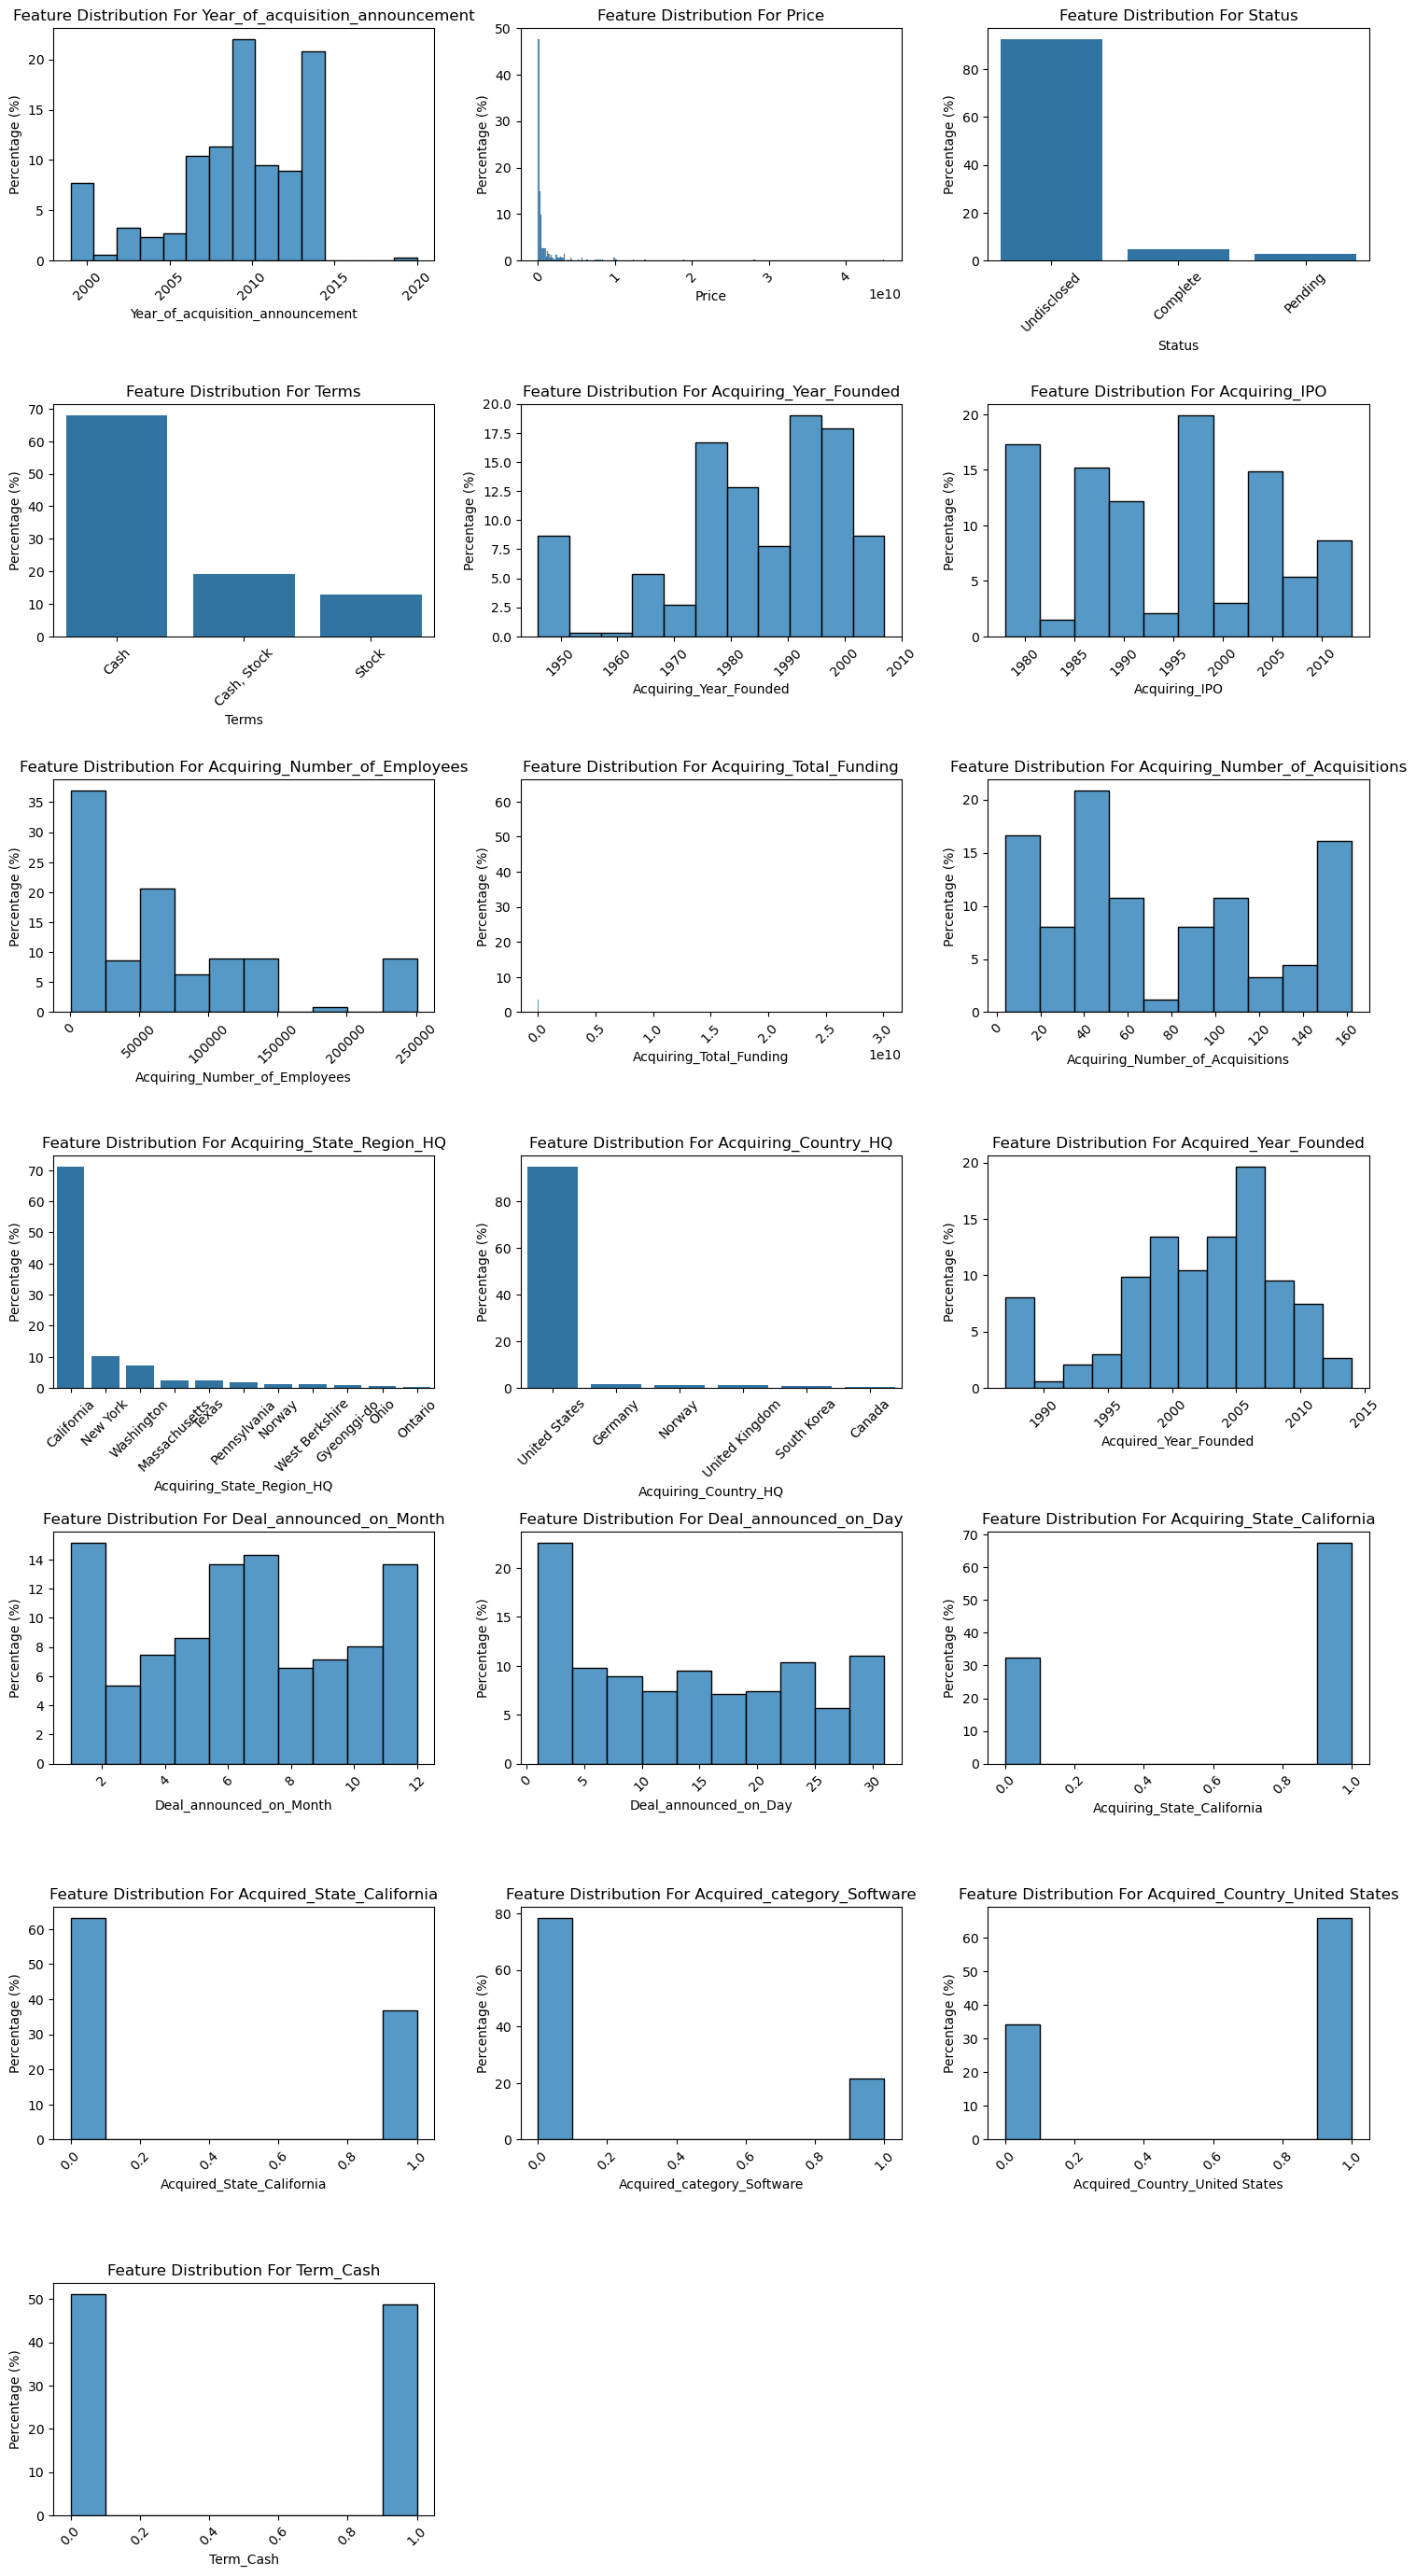

In [31]:
distribution_vis(df_merged, "Feature Distribution For ")

### Acquiring categories

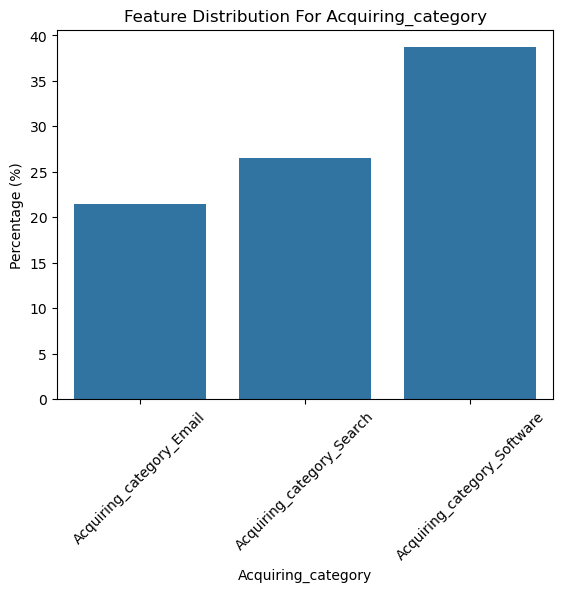

In [32]:
data = {}
for column in df_merged.columns:
    if 'Acquiring_category' in column:
        data[column] = df_merged[column].mean() * 100

plt.figure()
sns.barplot(x=list(data.keys()), y=list(data.values()))
plt.title('Feature Distribution For ' + 'Acquiring_category')
plt.xlabel('Acquiring_category')
plt.xticks(rotation=45)
plt.ylabel('Percentage (%)')
plt.show()

### Acquiring Members

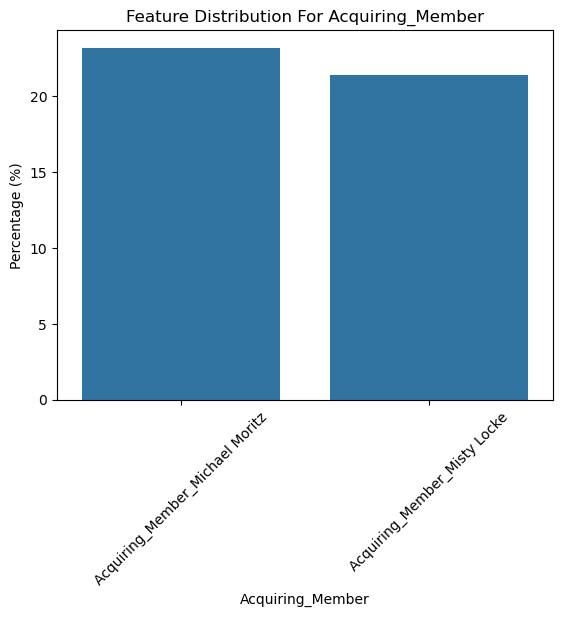

In [33]:
data = {}
for column in df_merged.columns:
    if 'Acquiring_Member' in column:
        data[column] = df_merged[column].mean() * 100

plt.figure()
sns.barplot(x=list(data.keys()), y=list(data.values()))
plt.title('Feature Distribution For ' + 'Acquiring_Member')
plt.xlabel('Acquiring_Member')
plt.xticks(rotation=45)
plt.ylabel('Percentage (%)')
plt.show()

### **Feature Distribution Summary**  

- **Year of Acquisition**:  
  - Most records are pre-2015, with peaks in **2010** and **2014**.  

- **Price**:  
  - **Right-skewed** distribution.  

- **Status**:  
  - Majority of records are **undisclosed**.  

- **Founding Years**:  
  - **Acquiring companies**: Increase before **1985**, then decline.  
  - **Acquired companies**: All founded post-**1990**, with most between **2002–2004**.  

- **Acquiring IPO**:  
  - Most records between **1995–2000**.  

- **Acquiring Number of Employees**:  
  - Majority have **<75,000** employees.  

- **Acquiring Total Funding**:  
  - **Right-skewed**.  

- **Deal Timing**:  
  - **Month**: Concentrated at **start, middle, and end** of the year.  
  - **Day**: Most deals occur at the **start of the month**.  

- **Location**:  
  - **California, US** dominates.  

- **Category**:  
  - **Acquiring**: Mostly **Software, Search, Email**.  
  - **Acquired**: Predominantly **Software**.  

- **Deal Terms**:  
  - **50%** are **cash**.  

- **Key Members**:  
  - **Misty Locke & Michael Moritz** are the most frequent.  

## Zero Funding

### Percentage

In [34]:
count = df_merged[df_merged['Acquiring_Total_Funding'] == 0].shape[0]
percent = count / df_merged.shape[0] * 100
print("Count:", count, "percent:", percent.__format__('0.2f') + '%')

Count: 143 percent: 42.56%


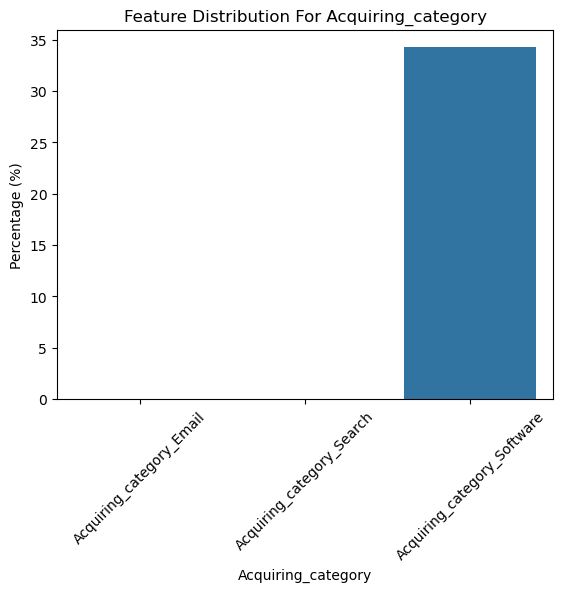

In [35]:
data = {}
for column in df_merged.columns:
    if 'Acquiring_category' in column:
        data[column] = df_merged[df_merged['Acquiring_Total_Funding'] == 0][column].mean() * 100

plt.figure()
sns.barplot(x=list(data.keys()), y=list(data.values()))
plt.title('Feature Distribution For ' + 'Acquiring_category')
plt.xlabel('Acquiring_category')
plt.xticks(rotation=45)
plt.ylabel('Percentage (%)')
plt.show()

**Key Findings:**  
- **42.26%** of acquiring companies are **self-funded** (zero external funding), all in **software**.  

## Features Correlation Heatmap

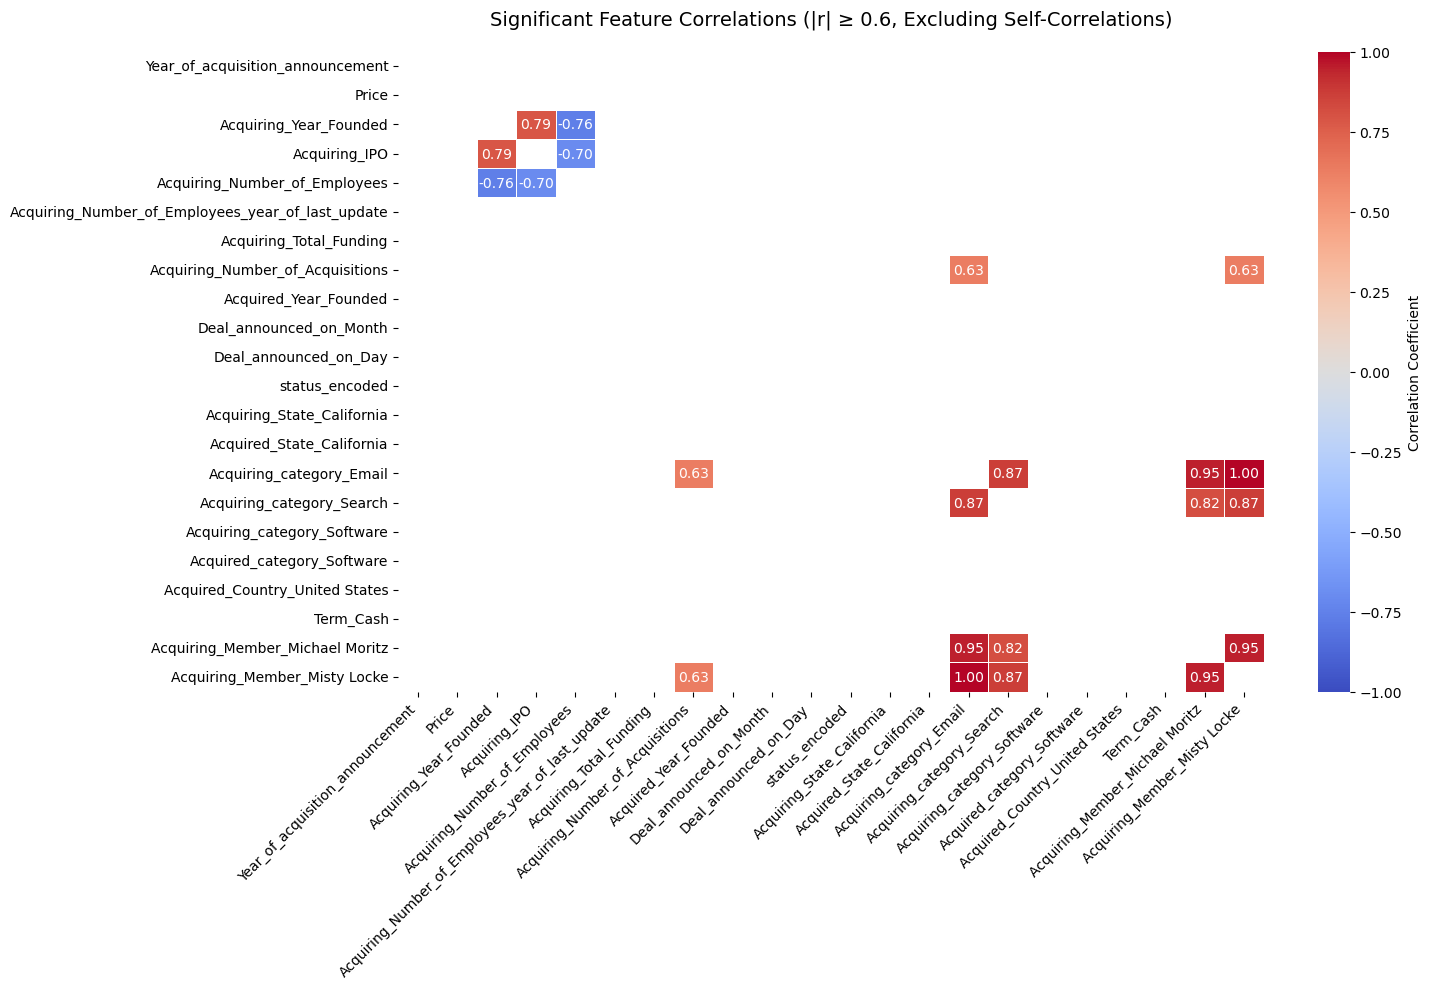

In [36]:
# Calculate correlations for numeric columns
numeric_cols = df_merged.select_dtypes(include=['int64', 'Int64', 'float64']).columns
numeric_cols = [x for x in numeric_cols if 'Text' not in  x]
corr_matrix = df_merged[numeric_cols].corr()

# Create masks
threshold = 0.6
significant_corr_mask = abs(corr_matrix) >= threshold
self_corr_mask = np.eye(len(corr_matrix), dtype=bool)  # Mask for diagonal (1.0 values)

# Combined mask (show only significant non-self correlations)
plot_mask = significant_corr_mask & ~self_corr_mask

# Plot
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(
    corr_matrix.where(plot_mask),  # Apply combined mask
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Correlation Coefficient'}
)

# Formatting
plt.title(f"Significant Feature Correlations (|r| ≥ {threshold}, Excluding Self-Correlations)", 
          pad=20, fontsize=14)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()

**Key Correlation Insights**

1. **Company Age Relationships**
   - 🟢 Strong positive link between *Acquiring Year Founded* and *IPO Year*
   - 🔴 Strong negative correlation with *Number of Employees*

2. **Financial Connections**
   - 🟢 *IPO Status* positively correlates with:
     - *Total Funding*
     - *Year Founded*
   - 🔴 Negative relationship between *IPO* and *Employee Count*

3. **Acquisition Patterns**
   - 📈 Higher acquisition frequency with:
     - Presence of **Misty Locke** as member
     - **Email** & **Search** categories

4. **Member-Category Relationships**
   - 👥 **Misty Locke** and **Michael Moritz** frequently collaborate in:
     - **Email**-category companies
   - 🌐 Most **Email**-category companies also operate in **Search**

## Relation Visualization Function

In [37]:
def relation_vis(df, column2, title):
    rows = math.ceil(len(df.columns) / 3.0)
    fig, axes = plt.subplots(rows, 3, figsize = (15, 4 * rows))

    x = 0
    axes = axes.flatten()
    for column in df.columns:
        if any(keyword in column for keyword in skip_columns) or column == column2:
            continue

        df_grouped = df.groupby(column)[column2].mean().reset_index()            
        if column in df_merged.select_dtypes('object'):
            sns.barplot(ax=axes[x], x=df_grouped[column], y= df_grouped[column2])
        else:
            sns.scatterplot(ax=axes[x], x=df_grouped[column], y= df_grouped[column2])

        axes[x].set_title(title + column)
        axes[x].set_xlabel(column)
        for label in axes[x].get_xticklabels():
            label.set_rotation(45)
        axes[x].set_ylabel(column2)
        x += 1

    for i in range(x, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

## Features Relation with Price

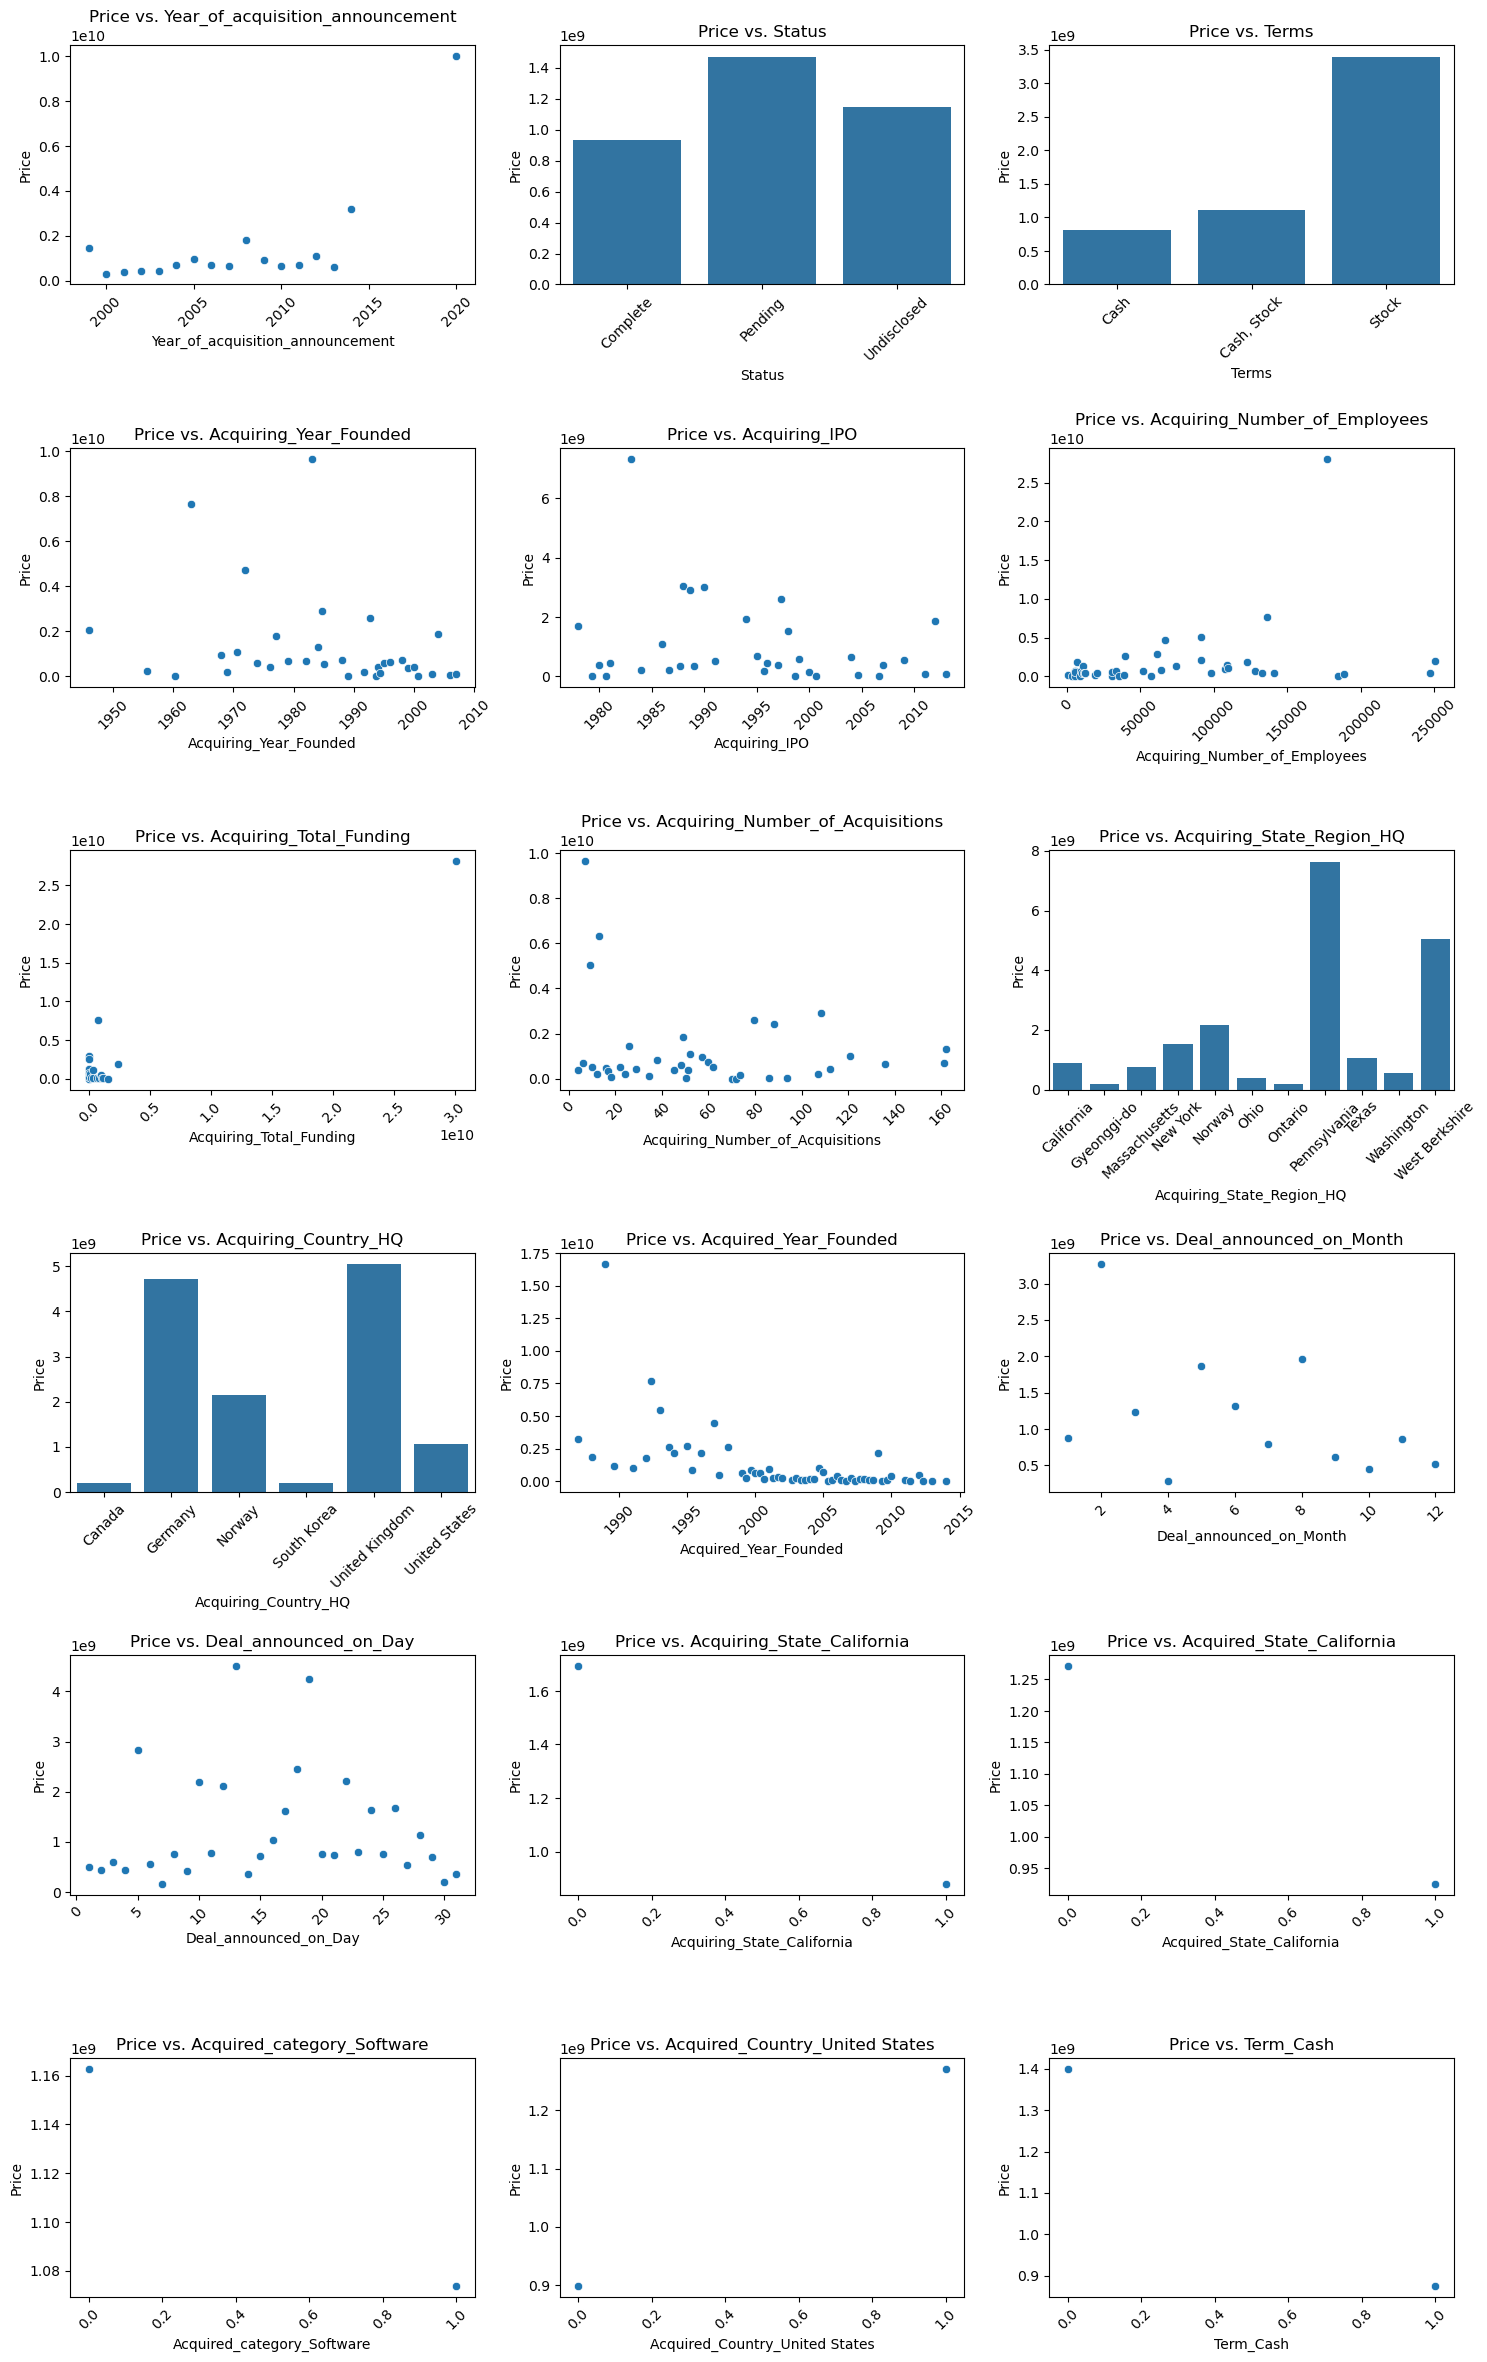

In [38]:
relation_vis(df_merged, 'Price', 'Price vs. ')

### Price vs. Categories

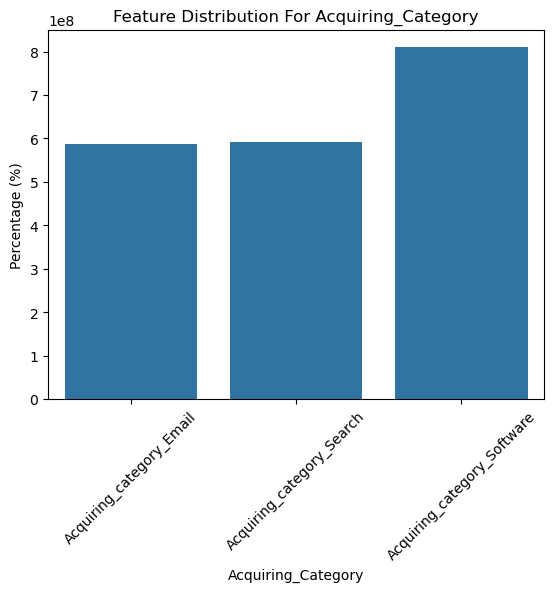

In [39]:
data = {}
for column in df_merged.columns:
    if 'Acquiring_category' in column:
        data[column] = df_merged[df_merged[column] == 1]['Price'].mean()

plt.figure()
sns.barplot(x=list(data.keys()), y=list(data.values()))
plt.title('Feature Distribution For ' + 'Acquiring_Category')
plt.xlabel('Acquiring_Category')
plt.xticks(rotation=45)
plt.ylabel('Percentage (%)')
plt.show()

**Price Relationship Analysis**

1. **Temporal Trends**
   - 📈 Acquisition Price: Steady increase since 2015
   - 📉 Earlier founding/IPO years → Higher prices
   - 🗓️ Month Effect: Prices decline as year progresses

2. **Company Characteristics**
   - 👥 Employee Count: Positive correlation with price
   - 💰 Total Funding: Direct relationship with price
   - 📊 Status Price Ranking:
     1. Pending
     2. Undisclosed 
     3. Complete

3. **Geographical Patterns**
   - 🌎 UK & Germany companies command premium prices
   - 🌎 Canada & South Korea companies command the cheapest prices
   - 📍 Pennsylvania & West Berkshire acquisitions are more expensive
   - 📍 California acquisitions are relatively cheaper

4. **Category Insights**
   - 💻 Acquired software companies: Lower prices
   - 🏢 Acquiring software companies: Pay higher premiums
   - 💵 Stock terms: Associated with higher prices

# ```Feature Selection```

## Getting Rid Of non-numeric column


In [40]:
# Preprocess selected columns by splitting comma-separated string values into lists
for col in ['Acquiring_Market_Categories', 'Acquiring_Founders', 'Acquiring_Board_Members', 'Acquired_Companies', 'Acquired_Market_Categories']:
    df_merged[col] = df_merged[col].astype(str).str.split(r',\s*')
    df_merged[col + '_length'] = df_merged[col].apply(lambda x: len(x) if isinstance(x, list) else 0)

## Drop categorical columns

In [41]:
# Drop columns with list-type values
df_numeric = df_merged.drop(columns= df_merged.select_dtypes(['object']).columns)

### Anova Test

In [42]:
e0 = ['Acquiring_State_California']
e3 =  ['Acquired_State_California']
e7 = ['Term_Cash']
e5 = ['Acquired_Country_United']
e6 = ['Acquired_category_Software']
e1 = ['status_encoded']
e2 = ['Acquiring_category_Email','Acquiring_category_Search','Acquiring_category_Software']
encoded = e0 + e1 + e2 + e3 + e5 + e6 + e7

numeric_col = [x for x in df_numeric.columns if x not in encoded]

In [43]:
def anova_test(df, feature, target):
    groups = []
    for val in df[feature].unique():
        groups.append(df[df[feature] == val][target])
    f_value, p_value = stats.f_oneway(*groups)
    if p_value < 0.05:
        print(f"significantly : {feature} and {target}  (p-value = {p_value:.4e})")
    else:
        print(f"NOT significantly : {feature} and {target} (p-value = {p_value:.4e})")


In [44]:
anova_test(df_numeric, 'Acquiring_State_California', 'Price')
anova_test(df_numeric, 'Acquired_State_California', 'Price')
anova_test(df_numeric, 'Term_Cash', 'Price')
anova_test(df_numeric, 'Acquired_Country_United States', 'Price')
anova_test(df_numeric, 'Acquired_category_Software', 'Price')
anova_test(df_numeric, 'status_encoded', 'Price')

significantly : Acquiring_State_California and Price  (p-value = 4.9205e-02)
NOT significantly : Acquired_State_California and Price (p-value = 3.8976e-01)
NOT significantly : Term_Cash and Price (p-value = 1.7515e-01)
NOT significantly : Acquired_Country_United States and Price (p-value = 3.6072e-01)
NOT significantly : Acquired_category_Software and Price (p-value = 8.4972e-01)
NOT significantly : status_encoded and Price (p-value = 9.3668e-01)


## Removing features due to Multicollinearity

In [45]:
corr_matrix = df_numeric.corr().abs()  
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.90

to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df_reduced = df_numeric.drop(columns=to_drop)
print("Removed features due to Multicollinearity:", to_drop)

Removed features due to Multicollinearity: ['Acquiring_Member_Michael Moritz', 'Acquiring_Member_Misty Locke', 'Acquiring_Text_engine', 'Acquiring_Text_free', 'Acquiring_Text_search', 'Acquiring_Text_search engine', 'Acquiring_Text_tool', 'News_Text_techcrunch com', 'Acquired_Companies_length']


## Removing features with low correlation < 0.1

In [46]:
# store all corr between cols in df_reduced and Price
corrs = {}
for col in df_reduced.columns:
    if col != 'Price':
       corrs[col] = df_reduced.corr()['Price'][col].__format__('0.4f')

print("Correlation with Price:")
#sort the correlations in descending order
corrs = dict(sorted(corrs.items(), key=lambda item: item[1], reverse=True))
for col, corr in corrs.items():
    if abs(float(corr)) < 0.1:
        df_reduced.drop(columns=[col], inplace=True)
    else:
        print(f"{col}: {corr}")

Correlation with Price:
Acquiring_Total_Funding: 0.4080
Acquired_Text_business: 0.1804
Acquiring_Number_of_Employees: 0.1569
Acquiring_Text_customer: 0.1446
Acquired_Text_service: 0.1366
Acquiring_Text_communication: 0.1359
Acquiring_Text_largest: 0.1354
Acquiring_Founders_length: 0.1143
Acquiring_Text_providing: 0.1062
Acquired_Year_Founded: -0.3081
Acquiring_Year_Founded: -0.1524
News_Text_million: -0.1516
Acquiring_Number_of_Employees_year_of_last_update: -0.1327
Acquiring_Market_Categories_length: -0.1173
Acquiring_Text_platform: -0.1162
Acquiring_Text_web: -0.1161
Acquiring_Text_global: -0.1110
Acquiring_State_California: -0.1074
Acquiring_Text_also: -0.1056
Acquired_Text_online: -0.1053


## Normalization

In [47]:
scaler = MinMaxScaler()

# Scale all features except 'Price'
features_to_scale = df_reduced.drop(columns=['Price']).columns.to_list()
scaled_features = scaler.fit_transform(df_reduced[features_to_scale])

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, 
                        columns=features_to_scale, 
                        index=df_reduced.index)

# Add back the unscaled 'Price' column
df_scaled['Price'] = df_reduced['Price']

## Feature Importance

In [48]:
best_features = {}
for col in df_scaled.columns:
    best_features[col] = 0

### Linear Regression

In [49]:
X = df_scaled.drop(columns=['Price'])  
y = df_scaled['Price']

# Initialize and fit RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)  # Select top 5 features
rfe.fit(X, y)  # Fit RFE using the features (X) and target (y)

# Get selected feature names
selected_features = X.columns[rfe.support_]
print("Selected features:", list(selected_features))
for x in selected_features:
    best_features[x] += 1

Selected features: ['Acquiring_Total_Funding', 'Acquired_Year_Founded', 'Acquiring_Text_also', 'Acquiring_Text_communication', 'Acquiring_Text_global', 'Acquiring_Text_largest', 'Acquiring_Text_providing', 'Acquired_Text_business', 'Acquired_Text_online', 'News_Text_million']


### RandomForest

In [50]:
#Using Random Forest 
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(df_scaled.drop(columns=['Price']), df_scaled['Price'])

# Get feature importances
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': df_scaled.drop(columns=['Price']).columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

for index, row in feat_imp_df[:10].iterrows():
    print(f"Feature: {row['Feature']}, Importance: {row['Importance']:.4f}")
    best_features[row['Feature']] += 1

Feature: Acquiring_Total_Funding, Importance: 0.2039
Feature: Acquired_Year_Founded, Importance: 0.1814
Feature: Acquired_Text_service, Importance: 0.1497
Feature: Acquiring_Text_largest, Importance: 0.1326
Feature: Acquired_Text_business, Importance: 0.1058
Feature: Acquiring_Text_providing, Importance: 0.0469
Feature: Acquiring_Year_Founded, Importance: 0.0291
Feature: Acquiring_Text_communication, Importance: 0.0241
Feature: Acquiring_Number_of_Employees, Importance: 0.0209
Feature: Acquired_Text_online, Importance: 0.0194


### XGBoost

In [51]:
#Using XGBoost
xgbb = xgb.XGBRegressor()
xgbb.fit(df_scaled.drop(columns=['Price']), df_scaled['Price'])
importances = xgbb.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': df_scaled.drop(columns=['Price']).columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp_df[:10])
for x in feat_imp_df[:10]['Feature']:
    best_features[x] += 1

                         Feature  Importance
10        Acquiring_Text_largest    0.469235
3        Acquiring_Total_Funding    0.233539
7   Acquiring_Text_communication    0.071779
19     Acquiring_Founders_length    0.047786
12      Acquiring_Text_providing    0.039988
4          Acquired_Year_Founded    0.035971
16         Acquired_Text_service    0.027112
14        Acquired_Text_business    0.013195
0         Acquiring_Year_Founded    0.011396
5     Acquiring_State_California    0.010065


### Lasso

In [52]:
# Using L1 Regression
lasso = Lasso(alpha=0.01, max_iter=100000)  # You can tune alpha
X = df_scaled.drop(columns=['Price'])  # Features
y = df_scaled['Price']                 # Target

lasso.fit(X, y)

# Get feature importances (absolute coefficients)
importance = abs(lasso.coef_)

# Pair feature names with their importance scores and sort
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values('Importance', ascending=False)

top_10_features = feature_importance.head(10)
print("Top 10 Lasso Feature Importances:")
for idx, row in top_10_features.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")
    best_features[row['Feature']] += 1

Top 10 Lasso Feature Importances:
Acquiring_Total_Funding: 23027264403.4844
Acquiring_Text_providing: 4681483841.8295
Acquired_Year_Founded: 3013504893.4419
Acquiring_Text_largest: 2988889489.5609
Acquired_Text_business: 2108190896.7312
Acquiring_Text_global: 1884058850.0468
Acquired_Text_online: 1629246119.9548
Acquiring_Text_communication: 1410055730.5000
News_Text_million: 1265760554.4622
Acquiring_Founders_length: 1260929596.0573


### Mutual_Info_Regression

In [53]:
#Using Mutal Info Regression
mi = mutual_info_regression(df_scaled.drop(columns=['Price']), df_scaled['Price'])
importance = pd.Series(mi, index=df_scaled.drop(columns=['Price']).columns).sort_values(ascending=False)
print(importance[:10])
for x in importance[:10].keys():
    best_features[x] += 1

Acquired_Year_Founded                                0.251214
News_Text_million                                    0.108424
Acquiring_Number_of_Employees                        0.104359
Acquiring_Year_Founded                               0.079071
Acquiring_Text_global                                0.060486
Acquiring_Total_Funding                              0.044919
Acquiring_Number_of_Employees_year_of_last_update    0.035899
Acquiring_Text_providing                             0.032931
Acquiring_Text_customer                              0.032879
Acquiring_Text_also                                  0.031189
dtype: float64


### SelectKBest

In [54]:
# Select top 10 features based on ANOVA F-value
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(df_scaled.drop(columns=['Price']), df_scaled['Price'])
selected_features = df_scaled.drop(columns=['Price']).columns[selector.get_support()]

print("Top 10 features based on ANOVA F-value:")
print(selected_features[:10])
for x in selected_features[:10]:
    best_features[x] += 1

Top 10 features based on ANOVA F-value:
Index(['Acquiring_Year_Founded', 'Acquiring_Number_of_Employees',
       'Acquiring_Total_Funding', 'Acquired_Year_Founded',
       'Acquiring_Text_communication', 'Acquiring_Text_customer',
       'Acquiring_Text_largest', 'Acquired_Text_business',
       'Acquired_Text_service', 'News_Text_million'],
      dtype='object')


### Summary

In [55]:
# Sort by values (descending)
best_features = {k: v for k, v in best_features.items() if v != 0}
sorted_features = dict(sorted(best_features.items(), key=lambda x: x[1], reverse=True))
print(sorted_features)

{'Acquiring_Total_Funding': 6, 'Acquired_Year_Founded': 6, 'Acquiring_Text_communication': 5, 'Acquiring_Text_largest': 5, 'Acquiring_Text_providing': 5, 'Acquired_Text_business': 5, 'Acquiring_Year_Founded': 4, 'News_Text_million': 4, 'Acquiring_Number_of_Employees': 3, 'Acquiring_Text_global': 3, 'Acquired_Text_online': 3, 'Acquired_Text_service': 3, 'Acquiring_Text_also': 2, 'Acquiring_Text_customer': 2, 'Acquiring_Founders_length': 2, 'Acquiring_Number_of_Employees_year_of_last_update': 1, 'Acquiring_State_California': 1}


## Different Combinations of Features

In [56]:
# # trying Different Combinations of Features to get the best features
# results = []
# feature_list = list(df_scaled.columns)
# feature_list.remove('Price')

# for r in range(1, len(feature_list) + 1):
#     print("combinations with length", r)
#     for feature_combination in combinations(feature_list, r):
#         # Select features
#         X = df_scaled[list(feature_combination)]
#         y = df_scaled['Price']
        
#         # Train-test split
#         X_train, X_test, y_train, y_test = train_test_split(
#             X, y, test_size=0.2, random_state=42
#         )
                
#         from sklearn.svm import SVR
        
#         # Create and train the SVR model
#         svr = SVR(
#             kernel='rbf',  # Radial Basis Function kernel (common choice)
#             C=1.0,         # Regularization parameter
#             epsilon=0.1    # Controls the width of the epsilon-insensitive tube
#         )
#         svr.fit(X_train, y_train)
        
#         # Train and Test R² Scores
#         train_score = svr.score(X_train, y_train)
#         test_score = svr.score(X_test, y_test)
        
#         # Store results
#         results.append({
#             'features': feature_combination,
#             'num_features': r,
#             'train_r2': train_score,
#             'test_r2': test_score
#         })
        
#     # Convert results to DataFrame for analysis
#     if len(results) > 0:
#         results_df = pd.DataFrame(results).sort_values(['test_r2', 'train_r2', 'num_features'], ascending=False)
#         results_df = results_df.head(5)
#         results_df.to_csv('best_features.csv')
# print(results_df.head())

# ``` Model Training```

## Linear Regression

### Best Combinations for Linear Regression

In [57]:
best_com_lr = pd.read_csv('CSV Files\\' + 'best_features_Linear.csv')
display(best_com_lr.head())

,features,num_features,train_r2,test_r2
0,"('Acquiring_Total_Funding', 'Acquiring_Text_cu...",9,0.253500,0.257053
1,"('Acquiring_Total_Funding', 'Acquiring_Text_cu...",10,0.263405,0.255898
2,"('Acquiring_Total_Funding', 'Acquiring_State_C...",11,0.266093,0.254636
3,"('Acquiring_Total_Funding', 'Acquiring_Text_gl...",9,0.257223,0.254587
4,"('Acquiring_Total_Funding', 'Acquiring_Text_gl...",8,0.241022,0.253531


### Train_Test Split

In [58]:
selected_features = best_com_lr.iloc[0]['features'].strip("()").replace("'", "").split(", ")
print("Selected Features:", selected_features)
X = df_scaled[selected_features]
y = df_scaled['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Selected Features: ['Acquiring_Total_Funding', 'Acquiring_Text_customer', 'Acquiring_Text_platform', 'Acquiring_Text_providing', 'Acquiring_Text_web', 'Acquired_Text_online', 'Acquired_Text_service', 'News_Text_million', 'Acquiring_Founders_length']


### Training

In [59]:
# Define parameter grid (Linear Regression has fewer tunable parameters)
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate intercept
    'copy_X': [True, False]          # Whether to copy X before fitting
}

# Create grid search
grid_search = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get best estimator
best_lr = grid_search.best_estimator_

# Calculate scores
train_score_lr = best_lr.score(X_train, y_train)
test_score_lr = best_lr.score(X_test, y_test)

# Print results
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MAE):", grid_search.best_score_)
print(f"Train R² Score: {train_score_lr:.4f}")
print(f"Test R² Score: {test_score_lr:.4f}")

# Train on whole data
best_lr.fit(X, y)

Best parameters: {'copy_X': True, 'fit_intercept': False}
Best score (negative MAE): -1505915011.982367
Train R² Score: 0.2327
Test R² Score: 0.2817


LinearRegression(fit_intercept=False)

### Actual vs Predicted Plot

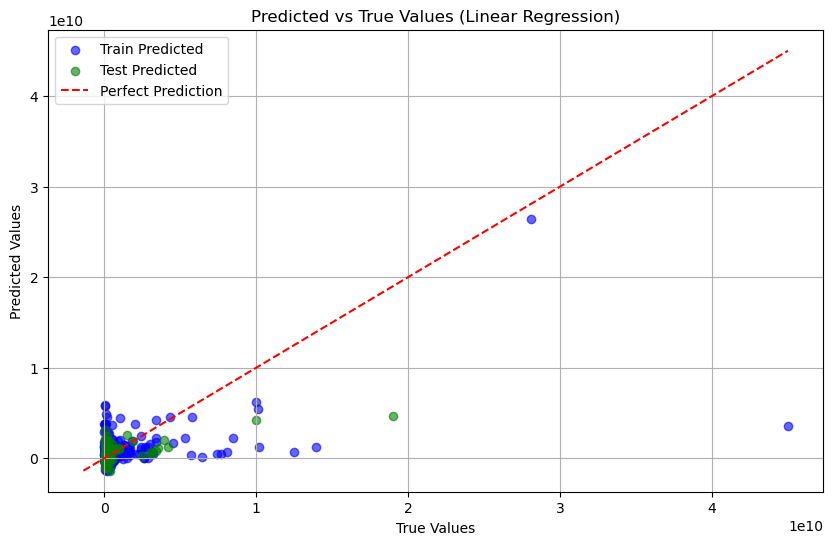

In [60]:
# Now predict
y_train_pred = best_lr.predict(X_train)
y_test_pred = best_lr.predict(X_test)

# Then plotting as you did:
plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_train_pred, color='blue', label='Train Predicted', alpha=0.6, marker='o')
plt.scatter(y_test, y_test_pred, color='green', label='Test Predicted', alpha=0.6, marker='o')

min_y = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
max_y = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())
plt.plot([min_y, max_y], [min_y, max_y], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Predicted vs True Values (Linear Regression)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

### Feature Importance

In [61]:
# Get coefficients
if hasattr(X_train, 'columns'):
    feature_names = X_train.columns
else:
    feature_names = [f'Feature_{i}' for i in range(X_train.shape[1])]

# Create a DataFrame of feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_lr.coef_,
    'Absolute_Coefficient': np.abs(best_lr.coef_)
})

# Sort by absolute coefficient value (most important first)
importance_df = importance_df.sort_values('Absolute_Coefficient', ascending=False)

# Display the feature importance
print("\nFeature Importance (based on linear regression coefficients):")
print(importance_df.to_string(index=False))


Feature Importance (based on linear regression coefficients):
                  Feature   Coefficient  Absolute_Coefficient
  Acquiring_Total_Funding  2.344371e+10          2.344371e+10
 Acquiring_Text_providing  5.008544e+09          5.008544e+09
  Acquiring_Text_customer  2.105125e+09          2.105125e+09
Acquiring_Founders_length  1.875661e+09          1.875661e+09
    Acquired_Text_service  1.407783e+09          1.407783e+09
        News_Text_million -1.295734e+09          1.295734e+09
  Acquiring_Text_platform -1.038151e+09          1.038151e+09
     Acquired_Text_online -7.240943e+08          7.240943e+08
       Acquiring_Text_web -5.892916e+08          5.892916e+08


## XGBoost

### Train_Test Split

In [62]:
best_com_xgb = pd.read_csv('CSV Files\\' + 'best_features_XGBOOST.csv')
selected_features = best_com_xgb.iloc[0]['features'].strip("()").replace("'", "").split(", ")
print("Selected Features:", selected_features)
X = df_scaled[selected_features]
y = df_scaled['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Selected Features: ['Acquiring_Text_customer', 'Acquired_Text_service', 'News_Text_million']


### Training

In [63]:
# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],  # More boosting rounds for better learning
    'max_depth': [10, 20, 30],            # Deeper trees (but not too deep to avoid overfitting)
    'learning_rate': [0.1, 0.3, 0.5],  # Wider range, balancing speed & performance
    'subsample': [0.1, 0.5, 1.0],         # Higher subsample ratios for stability
    'colsample_bytree': [0.1, 0.5, 1.0],  # More features per tree for better generalization
}

# Create grid search
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get best estimator
best_xgb = grid_search.best_estimator_

# Calculate scores
train_score_xgb = best_xgb.score(X_train, y_train)
test_score_xgb = best_xgb.score(X_test, y_test)

# Print results
print("\n=== Best Model Results ===")
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MAE):", grid_search.best_score_)
print(f"Train R² Score: {train_score_xgb:.4f}")
print(f"Test R² Score: {test_score_xgb:.4f}")

# Train on whole data
best_xgb.fit(X, y)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits

=== Best Model Results ===
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 1.0}
Best score (negative MAE): -1462488173.9394479
Train R² Score: 0.8147
Test R² Score: 0.2043


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

### Elbow Method

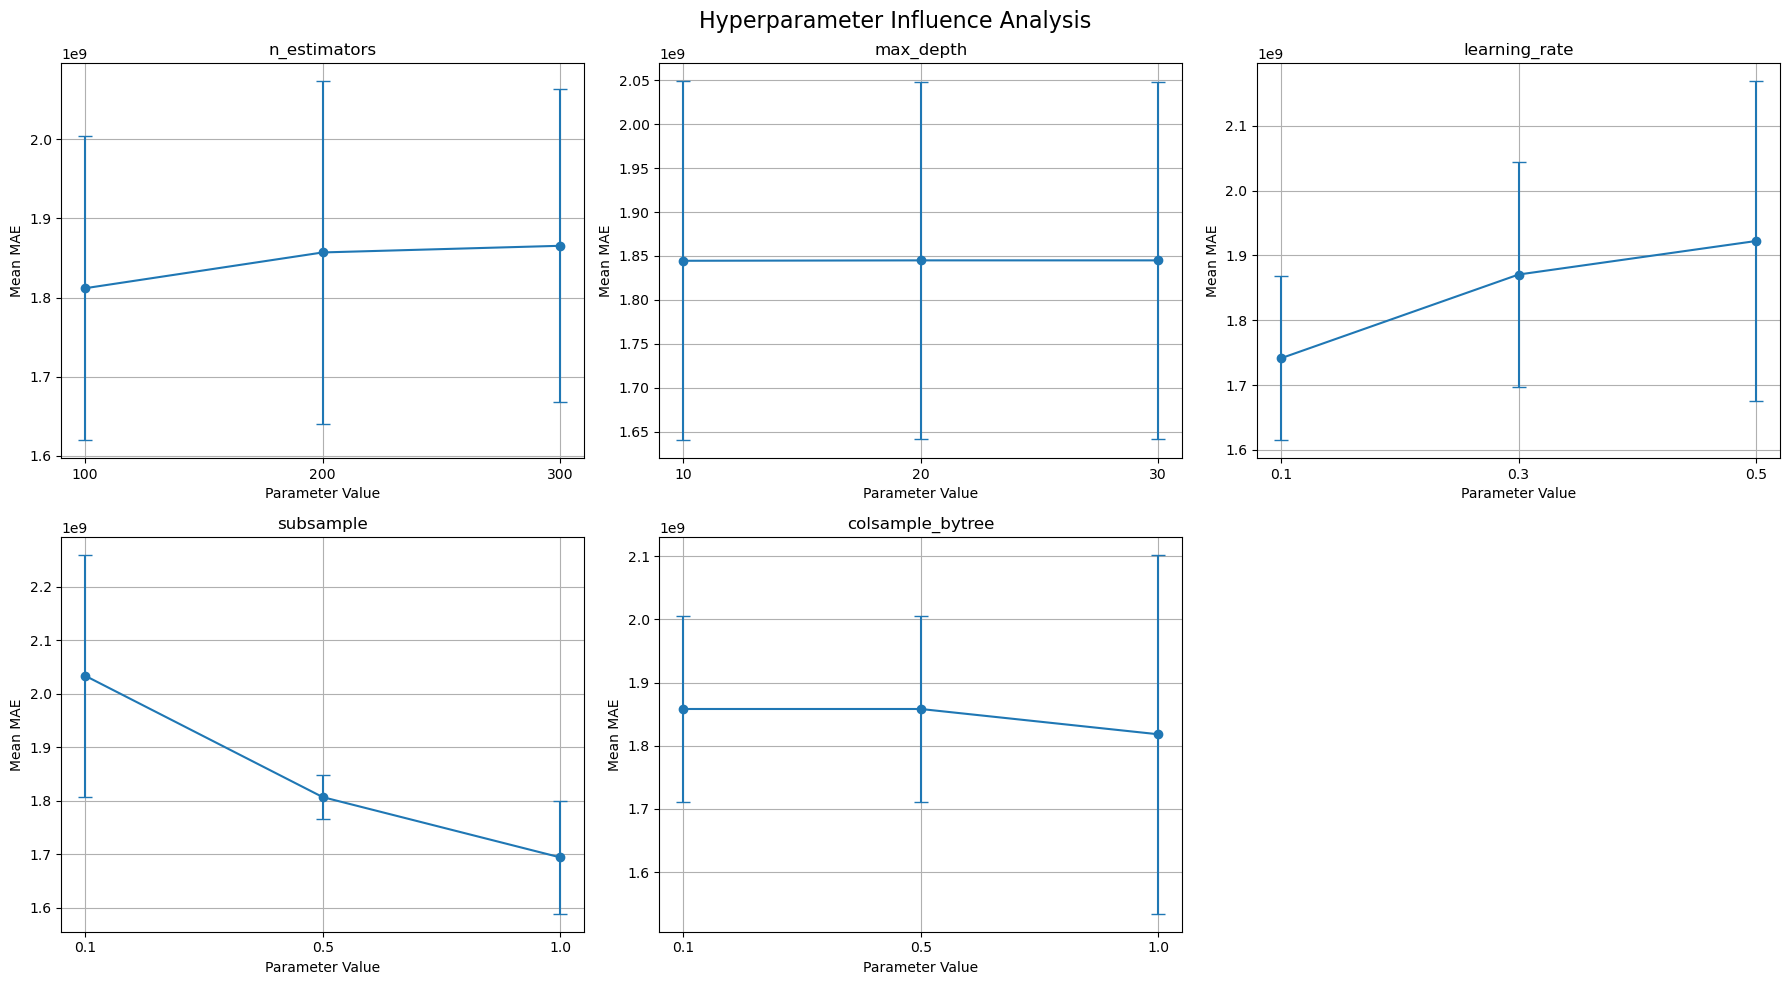

In [64]:
# Extract grid search results
results = pd.DataFrame(grid_search.cv_results_)

# Create subplots for each hyperparameter
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Hyperparameter Influence Analysis', fontsize=16)
axes = axes.ravel()

# Plot each parameter's effect
for i, param in enumerate(['param_n_estimators', 'param_max_depth', 
                          'param_learning_rate', 'param_subsample',
                          'param_colsample_bytree']):
    
    # Group by parameter value and get mean test score
    param_group = results.groupby(param)['mean_test_score'].agg(['mean', 'std'])
    param_group = param_group.sort_index()
    
    # Plot with error bars
    x = [str(x) for x in param_group.index]
    y = -param_group['mean']  # Convert back to positive MSE
    err = param_group['std']
    
    axes[i].errorbar(x, y, yerr=err, fmt='-o', capsize=5)
    axes[i].set_title(param.replace('param_', ''))
    axes[i].set_xlabel('Parameter Value')
    axes[i].set_ylabel('Mean MAE')
    axes[i].grid(True)

# Remove empty subplot
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### Actual vs Predicted Plot

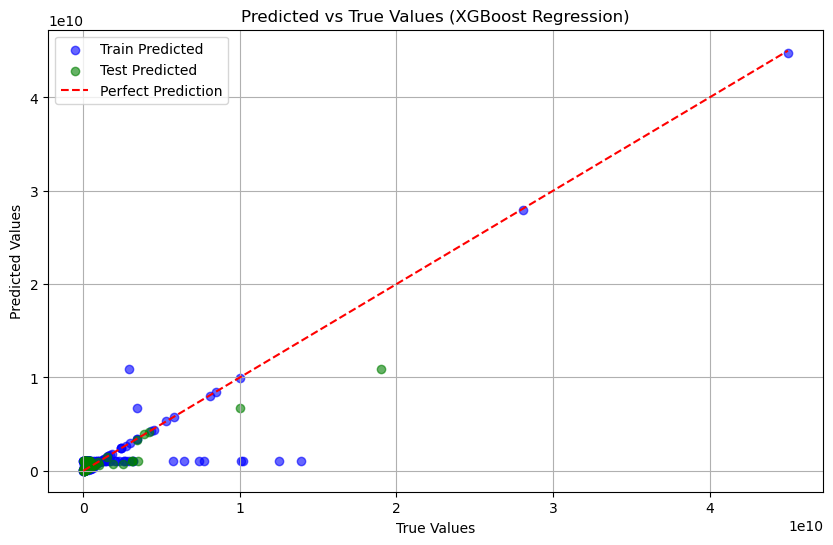

In [65]:
# Now predict
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# Then plotting as you did:
plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_train_pred, color='blue', label='Train Predicted', alpha=0.6, marker='o')
plt.scatter(y_test, y_test_pred, color='green', label='Test Predicted', alpha=0.6, marker='o')

min_y = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
max_y = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())
plt.plot([min_y, max_y], [min_y, max_y], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Predicted vs True Values (XGBoost Regression)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

### Feature Importance

In [66]:
# Feature importance (equivalent to coefficients in linear regression)
feature_importance = best_xgb.feature_importances_

# Create importance DataFrame
if hasattr(X_train, 'columns'):
    features = X_train.columns
else:
    features = [f'Feature_{i}' for i in range(X_train.shape[1])]
    
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df.to_string(index=False))


Feature Importances:
                Feature  Importance
Acquiring_Text_customer    0.813752
  Acquired_Text_service    0.152129
      News_Text_million    0.034119


## Random Forest

### Train_Test Split

In [67]:
best_com_rf = pd.read_csv('CSV Files\\' + 'best_features_rf.csv')
selected_features = best_com_rf.iloc[0]['features'].strip("()").replace("'", "").split(", ")
print("Selected Features:", selected_features)
X = df_scaled[selected_features]
y = df_scaled['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Selected Features: ['Acquiring_Total_Funding', 'Acquired_Text_service', 'News_Text_million', 'Acquiring_Founders_length']


### Training

In [68]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [5, 10, 15],         # Maximum depth of trees
    'min_samples_split': [2, 5, 10],      # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples at a leaf node
}

# Create grid search
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2  # Shows progress (optional)
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get best estimator
best_rf = grid_search.best_estimator_

# Calculate scores
train_score_rf = best_rf.score(X_train, y_train)
test_score_rf = best_rf.score(X_test, y_test)

# Print results
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MAE):", grid_search.best_score_)
print(f"Train R² Score: {train_score_rf:.4f}")
print(f"Test R² Score: {test_score_rf:.4f}")

# Train on whole data
best_rf.fit(X, y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best score (negative MAE): -1418057131.141293
Train R² Score: 0.5677
Test R² Score: 0.3698


RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=50,
                      random_state=42)

### Elbow Method

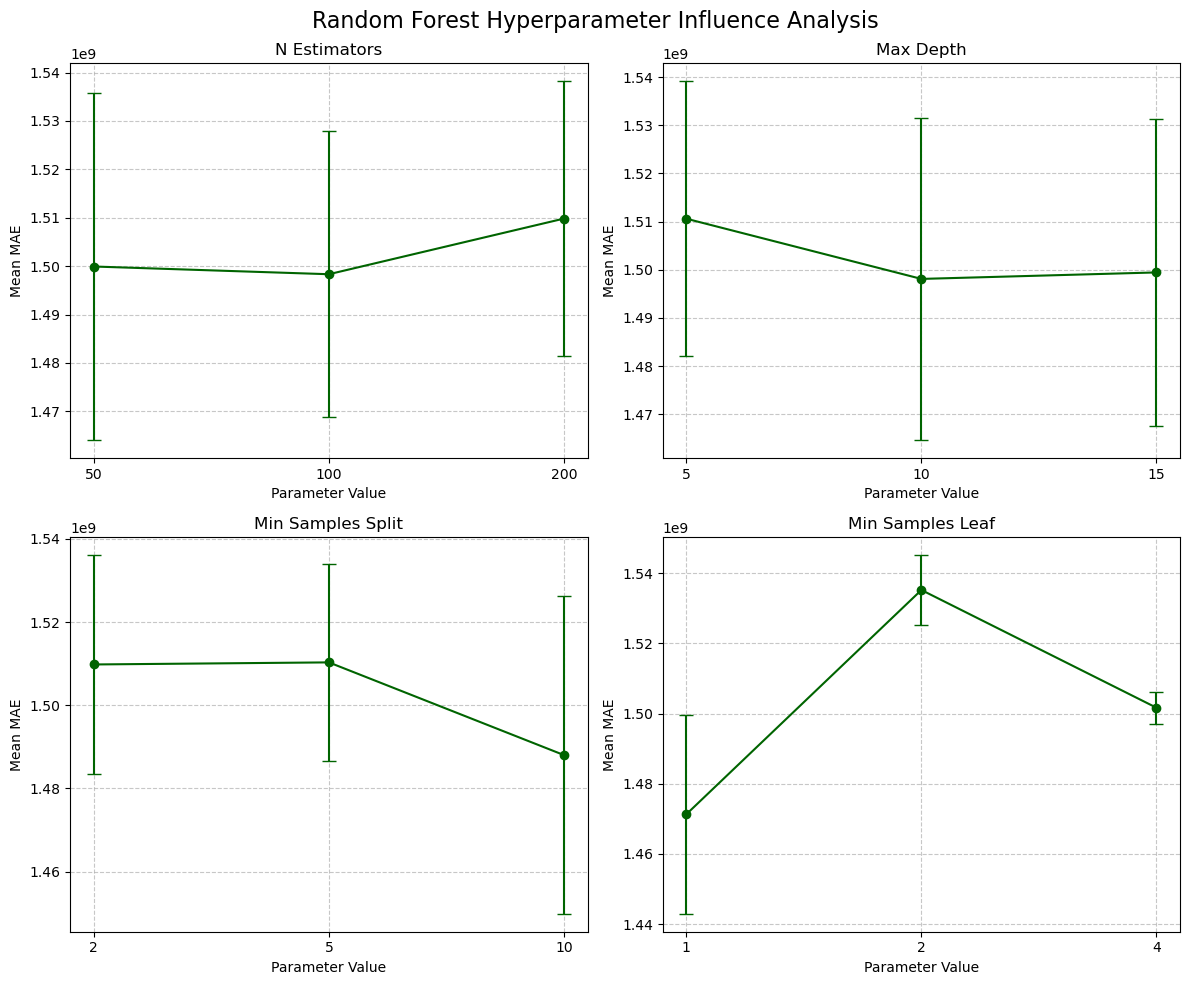

In [69]:
# Extract grid search results
results = pd.DataFrame(grid_search.cv_results_)

# Create subplots (2 rows x 2 cols for 4 parameters)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Random Forest Hyperparameter Influence Analysis', fontsize=16)
axes = axes.ravel()

# Core parameters (without max_features)
params_to_plot = ['param_n_estimators', 'param_max_depth', 
                 'param_min_samples_split', 'param_min_samples_leaf']

for i, param in enumerate(params_to_plot):
    # Group by parameter value
    param_group = results.groupby(param)['mean_test_score'].agg(['mean', 'std'])
    param_group = param_group.sort_index()
    
    # Plot with error bars
    x = [str(x) for x in param_group.index]
    y = -param_group['mean']  # Convert to positive MSE/MAE
    err = param_group['std']
    
    axes[i].errorbar(x, y, yerr=err, fmt='-o', capsize=5, color='darkgreen')
    axes[i].set_title(param.replace('param_', '').replace('_', ' ').title())
    axes[i].set_xlabel('Parameter Value')
    axes[i].set_ylabel('Mean MAE' if 'absolute' in str(grid_search.scoring) else 'Mean MSE')
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Actual vs Predicted Plot

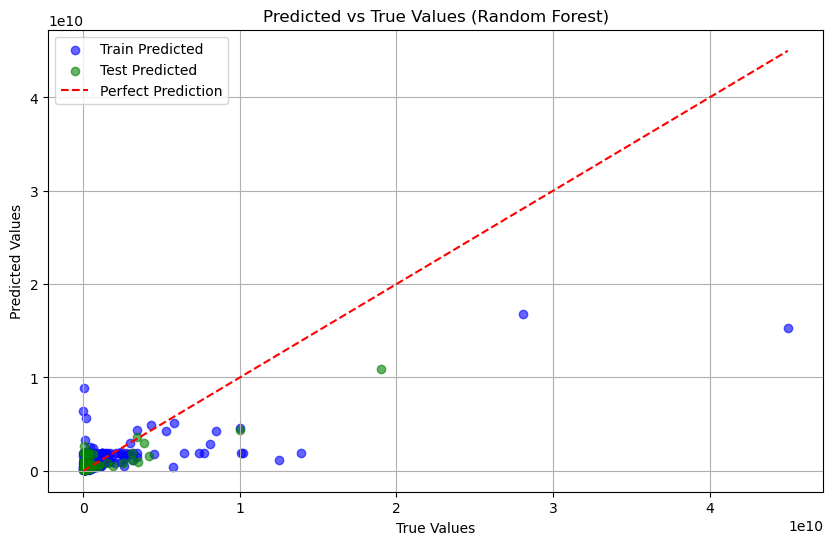

In [70]:
# Now predict
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Then plotting as you did:
plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_train_pred, color='blue', label='Train Predicted', alpha=0.6, marker='o')
plt.scatter(y_test, y_test_pred, color='green', label='Test Predicted', alpha=0.6, marker='o')

min_y = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
max_y = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())
plt.plot([min_y, max_y], [min_y, max_y], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Predicted vs True Values (Random Forest)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

### Feature Importance

In [71]:
# Feature importance (equivalent to coefficients in linear regression)
feature_importance = best_rf.feature_importances_

# Create importance DataFrame
if hasattr(X_train, 'columns'):
    features = X_train.columns
else:
    features = [f'Feature_{i}' for i in range(X_train.shape[1])]
    
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df.to_string(index=False))


Feature Importances:
                  Feature  Importance
  Acquiring_Total_Funding    0.427446
    Acquired_Text_service    0.410512
Acquiring_Founders_length    0.123324
        News_Text_million    0.038718


## Polynomial regression

### Train_Test Split

In [72]:
best_com_poly = pd.read_csv('CSV Files\\' + 'best_features_Poly.csv')
selected_features = best_com_poly.iloc[0]['features'].strip("()").replace("'", "").split(", ")
print("Selected Features:", selected_features)
X = df_scaled[selected_features]
y = df_scaled['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Selected Features: ['Acquiring_Total_Funding', 'Acquiring_Text_providing', 'Acquiring_Text_web', 'Acquired_Text_online', 'Acquired_Text_service', 'News_Text_million']


### Training

In [73]:
# Define parameter grid for Polynomial Regression
param_grid = {
    'polynomialfeatures__degree': [2, 3, 4],  # Degree of polynomial features
    'linearregression__fit_intercept': [True, False]  # Whether to calculate intercept
}

# Create pipeline
poly_reg = make_pipeline(
    PolynomialFeatures(),
    LinearRegression()
)

# Create grid search
grid_search = GridSearchCV(
    estimator=poly_reg,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get best estimator
best_poly = grid_search.best_estimator_

# Calculate scores
train_score_poly = best_poly.score(X_train, y_train)
test_score_poly = best_poly.score(X_test, y_test)

# Print results
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MAE):", grid_search.best_score_)
print(f"Train R² Score: {train_score_poly:.4f}")
print(f"Test R² Score: {test_score_poly:.4f}")

# Train on whole data
best_poly.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 2}
Best score (negative MAE): -13309942609.000206
Train R² Score: 0.2984
Test R² Score: 0.4357


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

### Elbow Method

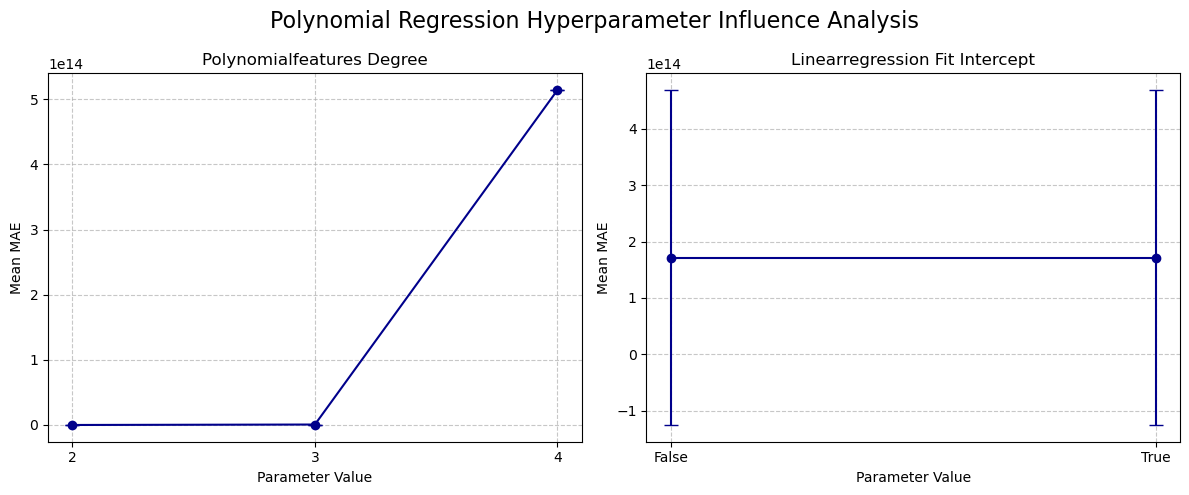

In [74]:
# Extract grid search results
results = pd.DataFrame(grid_search.cv_results_)

# Create subplots (1 row x 2 cols for polynomial parameters)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.suptitle('Polynomial Regression Hyperparameter Influence Analysis', fontsize=16)
axes = axes.ravel()

# Polynomial regression parameters to visualize
params_to_plot = ['param_polynomialfeatures__degree', 
                 'param_linearregression__fit_intercept']

for i, param in enumerate(params_to_plot):
    # Group by parameter value
    param_group = results.groupby(param)['mean_test_score'].agg(['mean', 'std'])
    param_group = param_group.sort_index()
    
    # Plot with error bars
    x = [str(x) for x in param_group.index]
    y = -param_group['mean']  # Convert to positive MSE/MAE
    err = param_group['std']
    
    axes[i].errorbar(x, y, yerr=err, fmt='-o', capsize=5, color='darkblue')  # Changed to blue
    axes[i].set_title(param.replace('param_', '').replace('__', ' ').replace('_', ' ').title())
    axes[i].set_xlabel('Parameter Value')
    axes[i].set_ylabel('Mean MAE' if 'absolute' in str(grid_search.scoring) else 'Mean MSE')
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Actual vs Predicted Plot

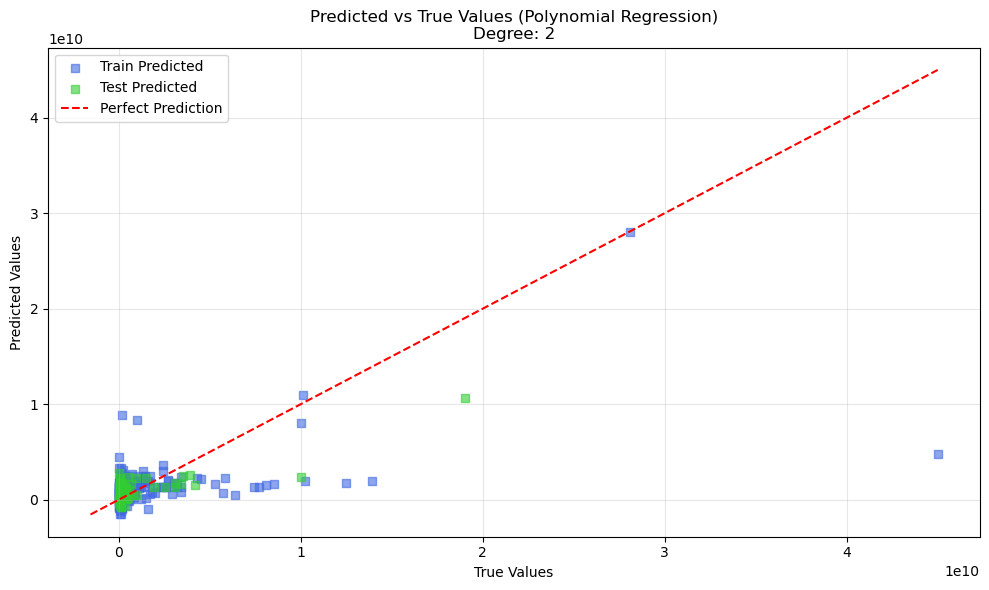

In [75]:
# Predict using best polynomial model
y_train_pred = best_poly.predict(X_train)
y_test_pred = best_poly.predict(X_test)

# Create plot
plt.figure(figsize=(10, 6))

# Scatter plots (changed colors to distinguish from RF)
plt.scatter(y_train, y_train_pred, color='royalblue', label='Train Predicted', alpha=0.6, marker='s')
plt.scatter(y_test, y_test_pred, color='limegreen', label='Test Predicted', alpha=0.6, marker='s')

# Perfect prediction line
min_y = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
max_y = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())
plt.plot([min_y, max_y], [min_y, max_y], color='red', linestyle='--', label='Perfect Prediction')

# Formatting
plt.title(f'Predicted vs True Values (Polynomial Regression)\nDegree: {grid_search.best_params_["polynomialfeatures__degree"]}')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Feature Importance

In [76]:
# Get polynomial feature names and coefficients
poly_features = best_poly.named_steps['polynomialfeatures'].get_feature_names_out(input_features=X_train.columns if hasattr(X_train, 'columns') else None)
coefficients = best_poly.named_steps['linearregression'].coef_

# Create importance DataFrame
importance_df = pd.DataFrame({
    'Feature': poly_features,
    'Coefficient': coefficients
}).sort_values('Coefficient', key=abs, ascending=False)

# Formatting for display
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: f'{x:.4f}')

print("\nPolynomial Feature Coefficients (sorted by absolute magnitude):")
print(importance_df.to_string(index=False))


Polynomial Feature Coefficients (sorted by absolute magnitude):
                                         Feature         Coefficient
Acquiring_Total_Funding Acquiring_Text_providing -2283134499096.1387
   Acquiring_Total_Funding Acquired_Text_service   160153230065.5839
       Acquiring_Total_Funding News_Text_million   -65487324929.8293
                       Acquiring_Total_Funding^2   -57553831695.6121
      Acquiring_Total_Funding Acquiring_Text_web   -18202207717.2139
    Acquiring_Total_Funding Acquired_Text_online   -15437938474.3423
  Acquiring_Text_providing Acquired_Text_service    -7774522329.4524
                      Acquiring_Text_providing^2     6203355365.8205
      Acquiring_Text_providing News_Text_million    -5048857177.9117
         Acquired_Text_service News_Text_million    -4063532177.1078
     Acquiring_Text_providing Acquiring_Text_web    -3714552869.6807
                               News_Text_million    -3595693653.7156
                        Acquiring_Text

## Best Accuracy

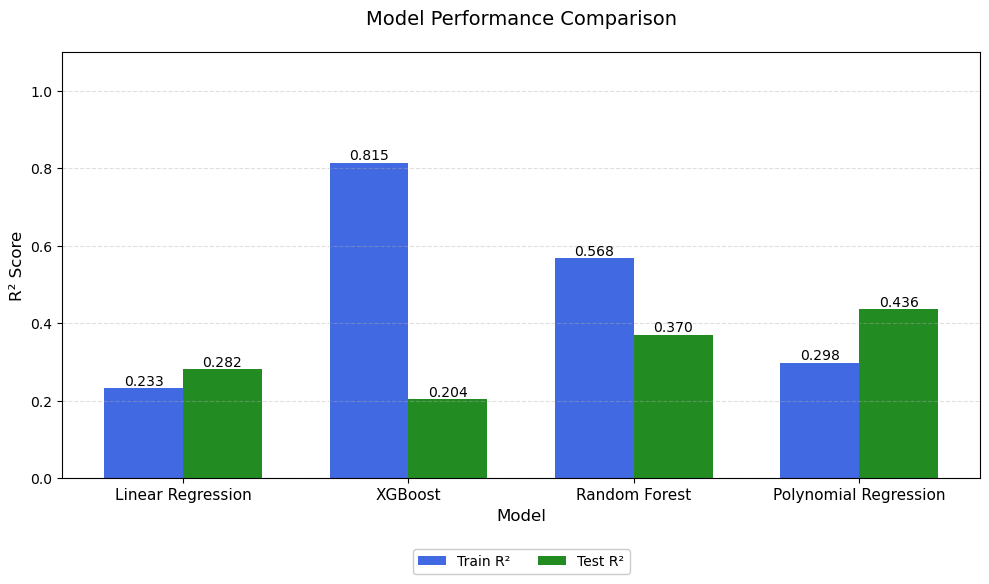

In [77]:
best_acc = {
    'Model': ['Linear Regression', 'XGBoost', 'Random Forest', 'Polynomial Regression'],
    'Train R² Score': [train_score_lr, train_score_xgb, train_score_rf, train_score_poly],
    'Test R² Score': [test_score_lr, test_score_xgb, test_score_rf, test_score_poly]
}

# Convert to DataFrame
results_df = pd.DataFrame(best_acc)

# Set up plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(results_df))

# Create bars
train_bars = plt.bar(index - bar_width/2, results_df['Train R² Score'], 
                    bar_width, color='royalblue', label='Train R²')
test_bars = plt.bar(index + bar_width/2, results_df['Test R² Score'], 
                   bar_width, color='forestgreen', label='Test R²')

# Customize plot
plt.title('Model Performance Comparison', fontsize=14, pad=20)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.xticks(index, results_df['Model'], fontsize=11)
plt.ylim(0, 1.1)  # R² range
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add value labels on top of bars
for bars in [train_bars, test_bars]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10)

# Add legend below
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', 
           ncol=2, framealpha=1)

plt.tight_layout()
plt.show()

# Deployment

In [78]:
#Imputer
dump(imputer, 'Models\\' + 'Knn_imputer.joblib')
dump(imputer_feature_names, 'Models\\' + 'imputer_feature_names.joblib')

# Scaler
dump(scaler, 'Models\\' + 'minmax_scaler.joblib')
dump(features_to_scale, 'Models\\' + 'features_to_scale.joblib')

# Vectorizers
for x in range(len(vectorizers)):
    dump(vectorizers[x], 'Models\\' + f'tfidf_vectorizer_{x}.joblib')

# Models
dump(best_lr, 'Models\\' + "Linear_regression_model.joblib")
dump(best_poly, 'Models\\' + "Poly_regression_model.joblib")
dump(best_rf, 'Models\\' + "Random_Forest_model.joblib")
dump(best_xgb, 'Models\\' + "xgb_model.joblib")

['Models\\xgb_model.joblib']

# ```Credits```

Team members:
- [Mazin Mahmoud](https://github.com/MazinMahmoud)
- [Mohamed Hussein](https://github.com/Mhmd7syn)
- salah
- david 
- wahdan
- esraa